## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# import ydata_profiling as yp

In [3]:
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    VotingRegressor,
    RandomForestRegressor,
    StackingRegressor,
    )

from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import train_test_split

# For preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    RobustScaler,
    OneHotEncoder,
)

from sklearn.metrics import mean_absolute_error

import joblib
import pickle
import json

## Setting a Theme

In [4]:
# sns.set_style('darkgrid')
# sns.set_palette('crest_r')
# my_color = '#1e90c9'


plt.style.use('ggplot')

palette = ["#58354a", "#425070", "#66c2a5", "#7c361a", "#a6d854"] # Magenta, Blue, Teal, Orange, Green
sns.set_theme(context="notebook", palette=palette)

## Remove Warnings

In [5]:
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read data

In [6]:
data = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

## Data Exploration

1. **`Country`**  
   - The name of the country corresponding to the data entry.

2. **`Year`**  
   - The year when the data or survey was collected.

3. **`Status`**  
   - Classification of the country (e.g., 'Developing', 'Developed') based on economic or regional status.

4. **`Life expectancy`**
    - The average number of years a person is expected to live.

5. **`Adult Mortality`**  
   - The adult mortality rate aged 15-60.

6. **`infant deaths`**  
   - The total number of infant deaths (children under 1 year old) per year.

7. **`Alcohol`**  
   - The per capita alcohol consumption rate in liters per year.

8. **`percentage expenditure`**  
   - The percentage of the Gross Domestic Product (GDP) spent on healthcare.

9. **`Hepatitis B`**  
   - The percentage of the population vaccinated against Hepatitis B.

10. **`Measles`**  
    - The total number of reported measles cases.

11. **`BMI`**  
    - The average Body Mass Index (BMI) of the population.

12. **`under-five deaths`**
    - The total number of deaths of children under five years old per year.

13. **`Polio`**  
    - The percentage of the population vaccinated against Polio.

14. **`Total expenditure`**  
    - The total health expenditure per capita (in USD).

15. **`Diphtheria`**  
    - The percentage of the population vaccinated against Diphtheria.

16. **`HIV/AIDS`**  
    - The prevalence rate of HIV/AIDS in the population as a percentage.

17. **`GDP`**  
    - The Gross Domestic Product (GDP) per capita (in USD).

18. **`Population`**  
    - The total population of the country.

19. **`thinness 1-19 years`**  
    - The prevalence of thinness (low weight-for-height) among children aged 1-19 years.

20. **`thinness 5-9 years`**  
    - The prevalence of thinness (low weight-for-height) among children aged 5-9 years.

21. **`Income composition of resources`**  
    - A measure of the distribution of income within the country, often represented as a value between 0 and 1.

22. **`Schooling`**  
    - The average number of years of schooling completed by individuals in the population.

In [7]:
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
474,Cambodia,2005,Developing,62.9,234.0,18,1.99,62.218173,NaN,264,13.9,22,82.0,5.84,82.0,1.4,474.223877,132721.0,11.5,11.6,0.470,10.0
1676,Mauritius,2006,Developing,71.8,165.0,0,3.73,502.384495,97.0,3,28.6,0,98.0,4.38,97.0,0.1,5695.969327,1233996.0,7.6,7.5,0.713,13.4
684,Cyprus,2004,Developed,78.6,65.0,0,13.03,1586.724172,88.0,0,54.8,0,98.0,6.42,98.0,0.1,23932.491280,1141.0,0.9,1.0,0.823,13.4
2187,Saint Vincent and the Grenadines,2012,Developing,72.8,159.0,0,6.93,0.000000,96.0,0,51.2,0,96.0,8.48,96.0,0.1,NaN,NaN,3.5,3.5,0.713,13.3
2364,Solomon Islands,2012,Developing,68.7,184.0,0,0.01,247.949228,99.0,0,48.1,0,99.0,5.48,99.0,0.1,1858.689868,551531.0,1.2,1.2,0.505,9.4


In [8]:
data.columns=data.columns.str.strip().str.lower()

In [9]:
df = data.copy()

In [10]:
df.size

64636

In [11]:
df.shape

(2938, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life expectancy                  2928 non-null   float64
 4   adult mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

In [13]:
df.isna().sum() / len(df) * 100.0

country                             0.000000
year                                0.000000
status                              0.000000
life expectancy                     0.340368
adult mortality                     0.340368
infant deaths                       0.000000
alcohol                             6.603131
percentage expenditure              0.000000
hepatitis b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five deaths                   0.000000
polio                               0.646698
total expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
income composition of resources     5.684139
schooling                           5.547992
dtype: flo

In [14]:
df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [15]:
df.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [16]:
df.describe(include='object')

,country,status
count,2938,2938
unique,193,2
top,Zimbabwe,Developing
freq,16,2426


In [17]:
df.duplicated().sum()

0

### let's look deeper, check patterns and overlook the data using `ydata_profiling`

In [18]:
# profile = yp.ProfileReport(df, title="My Data")
# profile.to_notebook_iframe()

# Cleaning Trip

#### 1- Some collumns we 'll edit its `dtype`
#### 2- Some Columns have number of missings not large we will handle it using `interpolation`
#### 3- will check and handle `outliers`
#### 4- divide the data to `numeric` and `categorical` data

In [19]:
df.isna().sum() / len(df) * 100.0

country                             0.000000
year                                0.000000
status                              0.000000
life expectancy                     0.340368
adult mortality                     0.340368
infant deaths                       0.000000
alcohol                             6.603131
percentage expenditure              0.000000
hepatitis b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five deaths                   0.000000
polio                               0.646698
total expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
income composition of resources     5.684139
schooling                           5.547992
dtype: flo

### lets see the correclations between features so we can clean it and find the important ones

In [20]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
numeric_df = df[numeric_columns]

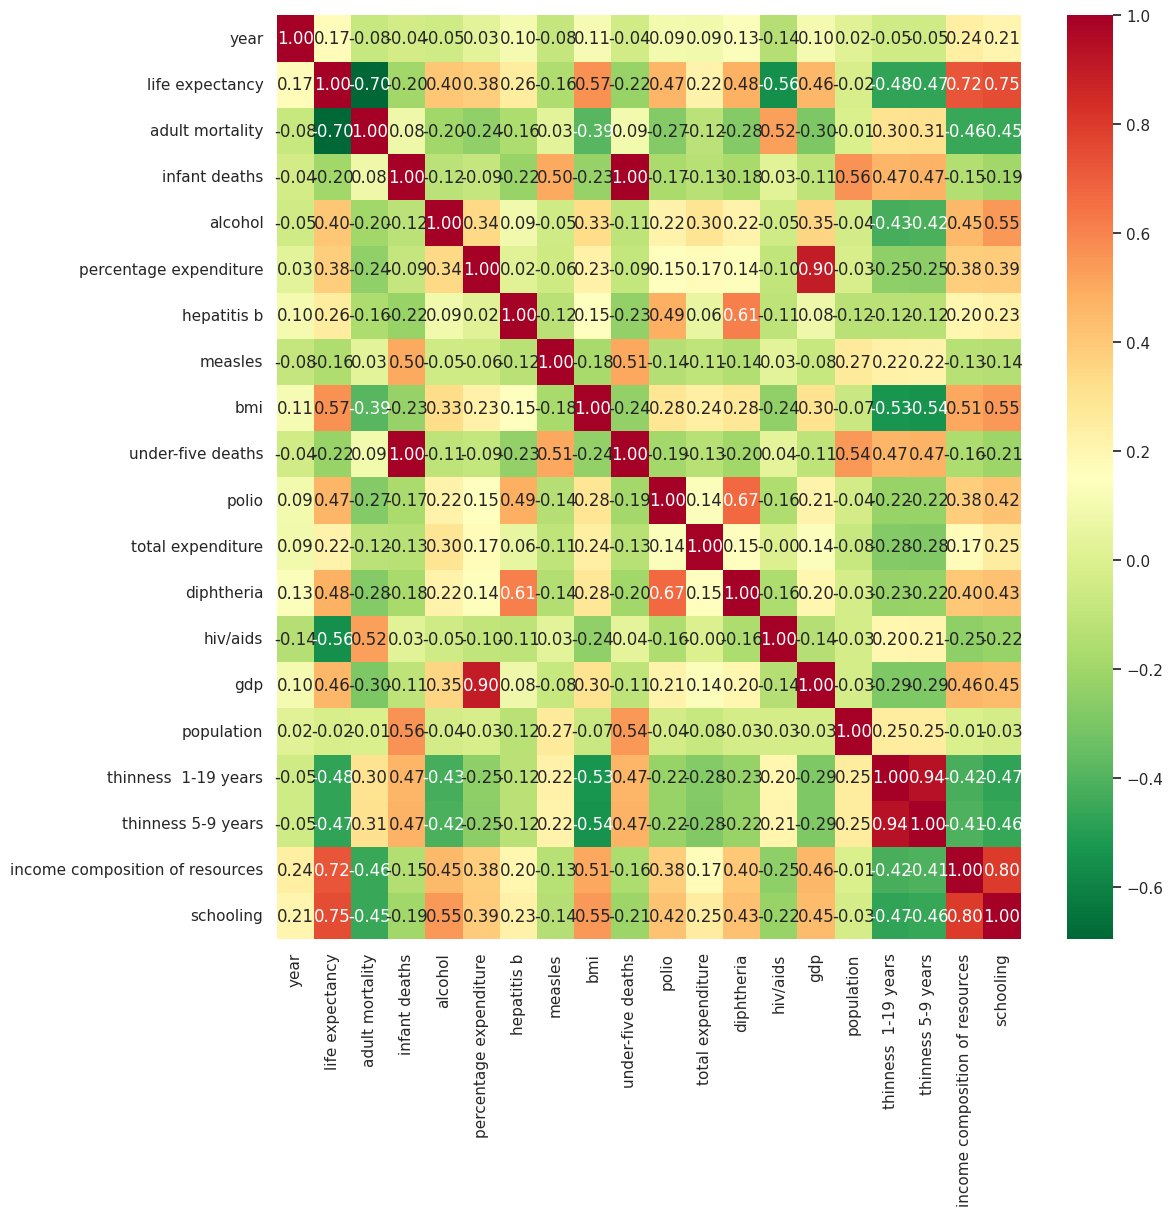

In [21]:
c = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(c, cmap='RdYlGn_r', annot=True, fmt=".2f")
plt.show()

## as we can see there are strong relationships between:
* `gdp` and `percentage expenditure` ,so let's drop `percentage expenditure`
* `under-five deaths` and `infant deaths` ,so let's drop `infant deaths`
* `thinness 1-19 years` and `thinness 5-9 years` ,so let's make them in one column `thinness`
* `schooling` and `income composition of resources` ,so let's drop `income composition of resources`
## strong inverse correlation between :
* `adult mortality` and `life_expectancy`

In [22]:
df.drop(columns=['percentage expenditure','infant deaths', 'income composition of resources'], inplace=True)

In [23]:
df["thinness"] = df[["thinness  1-19 years", "thinness 5-9 years"]].mean(axis=1)

df = df.drop(columns=["thinness  1-19 years", "thinness 5-9 years"])

In [24]:
df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'alcohol', 'hepatitis b', 'measles', 'bmi', 'under-five deaths',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp',
       'population', 'schooling', 'thinness'],
      dtype='object')

In [25]:
percentage_cols = ['hepatitis b', 'polio', 'diphtheria', 'hiv/aids', 'thinness']

for col in percentage_cols:
    df.loc[df[col] > 100, col] = np.nan

In [26]:
df.isnull().sum()*100/len(df)


country               0.000000
year                  0.000000
status                0.000000
life expectancy       0.340368
adult mortality       0.340368
alcohol               6.603131
hepatitis b          18.822328
measles               0.000000
bmi                   1.157250
under-five deaths     0.000000
polio                 0.646698
total expenditure     7.692308
diphtheria            0.646698
hiv/aids              0.000000
gdp                  15.248468
population           22.191967
schooling             5.547992
thinness              1.157250
dtype: float64

In [27]:
countries = df['country'].unique()

# list of incomplete columns
fill_list = ['adult mortality','alcohol','hepatitis b','measles','bmi','polio','total expenditure','diphtheria','gdp','population','thinness', 'schooling']

# Treat null values using interpolation.
for country in countries:
    df.loc[df['country'] == country,fill_list] = df.loc[df['country'] == country,fill_list].interpolate()

In [28]:
df.isnull().sum()*100/len(df)


country               0.000000
year                  0.000000
status                0.000000
life expectancy       0.340368
adult mortality       0.340368
alcohol               6.569095
hepatitis b           4.901293
measles               0.000000
bmi                   1.157250
under-five deaths     0.000000
polio                 0.000000
total expenditure     7.181756
diphtheria            0.000000
hiv/aids              0.000000
gdp                  14.363513
population           22.191967
schooling             5.547992
thinness              1.157250
dtype: float64

## Clean `country` column

In [29]:
df['country'].value_counts()

country
Zimbabwe                                                16
Turkmenistan                                            16
Uganda                                                  16
Ukraine                                                 16
United Arab Emirates                                    16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Azerbaijan                                              16
Bahamas                                                 16
Bahrain                                                 16
Bangladesh                                              16
Barbados                                                16
Belarus                                                 16
Belgium                                                 16
Belize                                                  16
Benin                                           

In [30]:
df['country'].isna().sum()

0

## Clean `year` column

In [31]:
df['year'].isna().sum()

0

In [32]:
df['year'].value_counts()

year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64

<Axes: xlabel='year'>

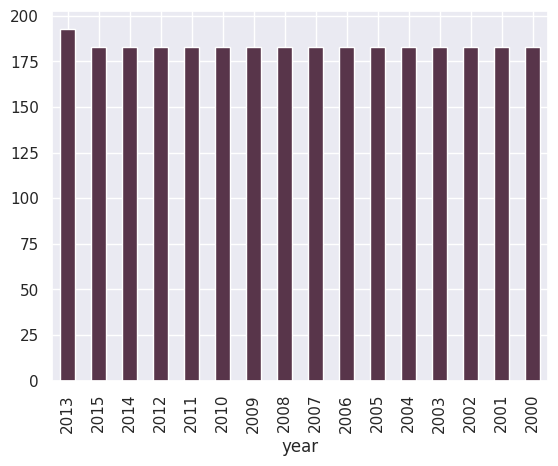

In [33]:
df['year'].value_counts().plot(kind='bar')

## Clean `status` column

In [34]:
df['status'].isna().sum()

0

In [35]:
df['status'].value_counts()

status
Developing    2426
Developed      512
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7a73eea6db10>,
 [Text(-0.939223082687329, 0.5725906050113911, 'Developing'),
  Text(0.9392231362971265, -0.572590517074977, 'Developed')],
 [Text(-0.5123034996476339, 0.3123221481880315, '82.6%'),
  Text(0.5123035288893416, -0.3123221002227147, '17.4%')])

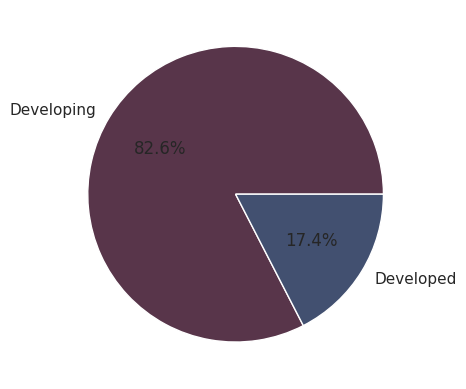

In [36]:
plt.pie(df['status'].value_counts().values, labels=df['status'].value_counts().index, autopct='%1.1f%%')

### Note more than 80% of countries in the survey is `Developing`

## Clean `adult mortality`

In [37]:
df['adult mortality'].isna().sum()

10

In [38]:
df['adult mortality'].value_counts()

adult mortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
19.0     23
144.0    22
15.0     21
13.0     21
17.0     21
161.0    20
165.0    20
127.0    20
134.0    19
66.0     19
189.0    19
76.0     19
22.0     18
157.0    18
88.0     18
69.0     17
74.0     17
78.0     17
82.0     16
122.0    16
7.0      16
146.0    16
121.0    16
83.0     16
183.0    16
92.0     16
142.0    16
84.0     16
123.0    16
132.0    16
18.0     15
81.0     15
68.0     15
184.0    15
174.0    15
147.0    15
133.0    15
163.0    15
72.0     15
79.0     15
89.0     15
98.0     15
126.0    15
218.0    14
24.0     14
85.0     14
77.0     14
64.0     14
65.0     14
124.0    14
192.0    14
75.0     14
137.0    14
73.0     14
145.0    14
158.0    14
93.0     14
225.0    14
219.0    14
177.0    14
23.0     14
148.0    14
96.0     14
125.0    14
99.0     14
129.0    13
178.0    13
172.0    13
8.0      13
118.0    13
194.0    13
136.0    13
167.0    13
71.0     13
67.0     13
86.0     13
135.0    13


In [39]:
df[df['adult mortality'].isna()]

,country,year,status,life expectancy,adult mortality,alcohol,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,schooling,thinness
624,Cook Islands,2013,Developing,NaN,NaN,0.01,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,NaN,0.10
769,Dominica,2013,Developing,NaN,NaN,0.01,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,12.7,2.65
1650,Marshall Islands,2013,Developing,NaN,NaN,0.01,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.0,0.10
1715,Monaco,2013,Developing,NaN,NaN,0.01,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0.01,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,9.6,0.10
1909,Niue,2013,Developing,NaN,NaN,0.01,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,NaN,0.10
1958,Palau,2013,Developing,NaN,NaN,NaN,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,14.2,0.10
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,8.54,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,13.4,3.65
2216,San Marino,2013,Developing,NaN,NaN,0.01,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,15.1,NaN
2713,Tuvalu,2013,Developing,NaN,NaN,0.01,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.0,0.15


In [40]:
countries_with_missed_mortality_adults = df.loc[df['adult mortality'].isna(), 'country'].unique()

for country in countries_with_missed_mortality_adults:

    mean_value = df[ df['year'] == 2013.0]['adult mortality'].mean()
    df.loc[df['adult mortality'].isna() , 'adult mortality'] = mean_value


## Clean `alcohol` column

In [41]:
df['alcohol'].value_counts()

alcohol
0.010     288
0.030      15
0.040      13
0.020      12
0.090      12
1.180      10
0.210      10
0.060      10
0.050       9
0.490       9
0.080       9
0.540       9
0.550       9
0.560       9
0.170       8
0.530       8
1.290       8
0.500       8
0.460       7
0.280       7
7.380       7
1.160       7
2.860       7
0.200       7
0.100       7
6.370       6
0.850       6
1.600       6
0.360       6
0.450       6
3.100       6
0.610       6
2.550       6
2.580       6
1.370       6
0.510       6
4.160       6
0.160       6
2.160       6
0.470       6
1.230       6
0.380       6
3.130       6
0.110       6
0.320       6
1.240       6
6.900       6
2.530       6
1.760       6
9.560       6
1.490       6
6.500       6
1.540       5
1.750       5
6.200       5
6.560       5
11.500      5
2.470       5
8.300       5
1.730       5
0.120       5
1.100       5
1.980       5
4.140       5
1.530       5
1.830       5
7.840       5
1.590       5
4.250       5
2.750       5
1.470       

In [42]:
df['alcohol'].isna().sum()

193

In [43]:
df['alcohol'].fillna(df['alcohol'].mode()[0], inplace=True)

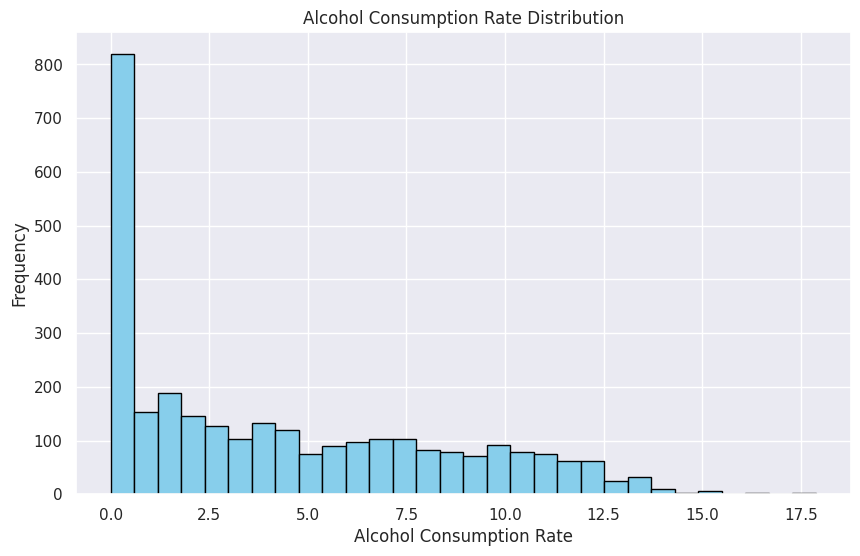

In [44]:
# Plot the histogram for the 'alcohol_consumption_rate' column
plt.figure(figsize=(10, 6))
plt.hist(df['alcohol'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Alcohol Consumption Rate Distribution')
plt.xlabel('Alcohol Consumption Rate')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Clean `hepatitis b` column

In [45]:
df['hepatitis b'].isna().sum()

144

In [46]:
df['hepatitis b'].value_counts()

hepatitis b
99.0    240
98.0    211
96.0    171
95.0    162
97.0    155
94.0    128
93.0    101
92.0     92
89.0     80
91.0     75
9.0      75
88.0     67
83.0     63
8.0      59
42.0     49
87.0     47
64.0     44
82.0     44
84.0     43
86.0     42
81.0     39
79.0     37
78.0     33
85.0     32
2.0      32
75.0     30
73.0     29
76.0     28
77.0     27
7.0      27
68.0     26
63.0     25
74.0     22
6.0      21
31.0     21
71.0     20
66.0     19
62.0     19
65.0     19
5.0      19
67.0     18
72.0     17
46.0     17
47.0     15
57.0     14
28.0     13
17.0     13
14.0     12
69.0     11
24.0     10
36.0     10
25.0     10
43.0      9
53.0      9
18.0      8
54.0      8
61.0      8
22.0      8
51.0      8
39.0      7
56.0      7
48.0      6
27.0      6
59.0      6
49.0      6
4.0       6
52.0      5
55.0      5
29.0      5
44.0      5
58.0      4
32.0      4
45.0      4
41.0      4
35.0      3
21.0      3
15.0      3
38.0      2
33.0      2
1.0       2
37.0      2
11.0      1
26.0

(array([ 241.,   40.,   57.,   51.,  115.,   66.,  189.,  243.,  457.,
        1335.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

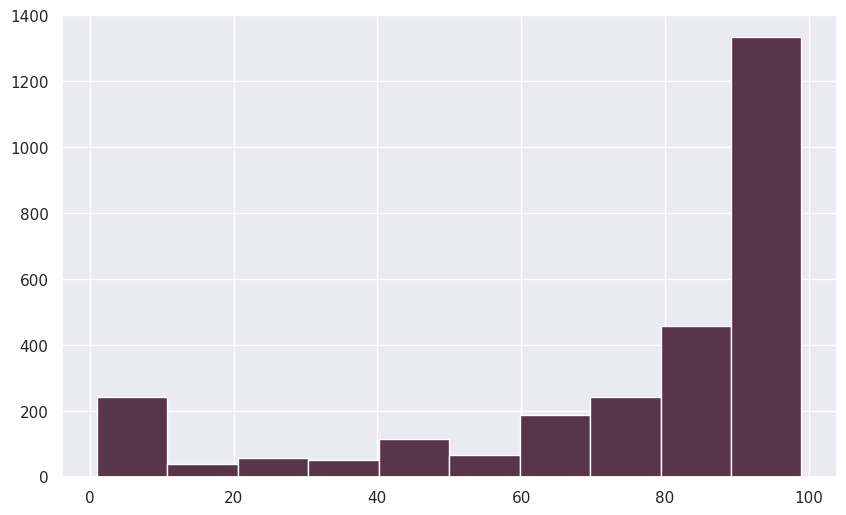

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(df['hepatitis b'])

In [48]:
df['hepatitis b'].interpolate(method='linear', inplace=True)


In [49]:
df['hepatitis b'].isna().sum()

0

## Clean `measles` column

In [50]:
df['measles'].isna().sum()

0

In [51]:
df['measles'].value_counts()

measles
0         983
1         104
2          68
3          44
4          33
6          29
7          28
5          25
8          24
9          22
10         21
11         21
15         19
22         17
18         15
13         15
20         13
12         13
26         13
17         13
27         12
23         12
33         11
16         11
35         10
24          9
32          9
19          9
39          8
14          8
21          8
31          8
50          8
28          7
43          7
45          7
36          7
48          7
55          7
37          6
59          6
49          6
25          6
73          6
65          6
71          6
40          6
34          6
51          6
115         5
120         5
99          5
30          5
101         5
217         5
68          5
47          5
63          5
64          5
38          5
46          5
79          5
44          5
129         4
141         4
61          4
77          4
122         4
190         4
62          4
42          

<Axes: >

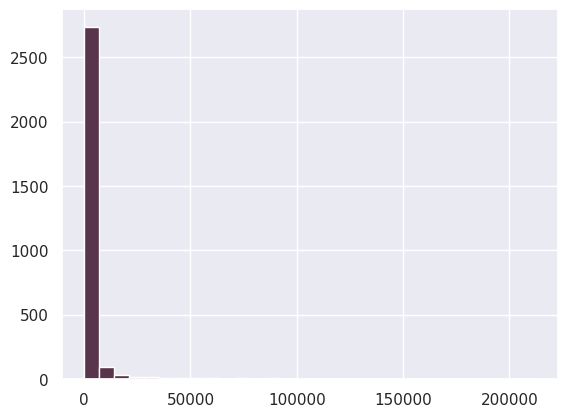

In [52]:
df['measles'].hist(bins=30)

<Axes: >

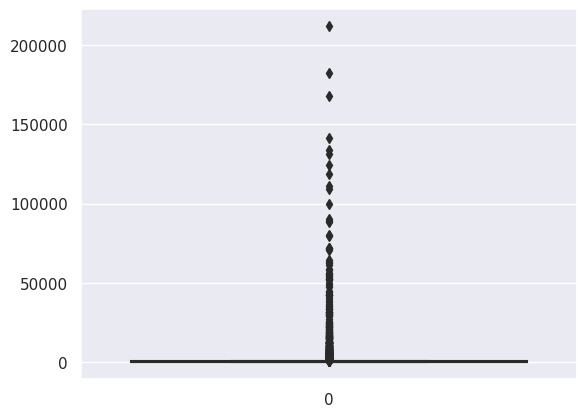

In [53]:
sns.boxplot(df['measles'])

## Clean `bmi` column

In [54]:
df['bmi'].isna().sum()

34

In [55]:
df['bmi'].value_counts()

bmi
58.5    18
57.0    16
55.8    16
54.2    15
59.9    15
59.3    14
52.8    13
55.0    13
56.5    13
59.4    13
58.1    13
56.6    12
56.1    12
6.9     12
57.6    12
6.2     12
57.2    12
55.7    12
2.7     12
6.1     12
6.5     12
2.1     11
17.3    11
57.8    11
48.6    11
18.0    11
55.3    11
54.1    11
57.5    11
56.3    11
49.9    11
57.4    11
22.1    10
55.1    10
17.6    10
16.4    10
54.6    10
54.0    10
58.6    10
47.9    10
61.3    10
17.5    10
57.7    10
58.7    10
55.2    10
58.2    10
23.8    10
18.5    10
59.0    10
54.8    10
21.7    10
21.2    10
21.3    10
54.7    10
13.9    10
18.2     9
2.2      9
17.9     9
54.9     9
55.4     9
56.4     9
58.0     9
51.2     9
56.9     9
53.5     9
45.9     9
16.7     9
16.1     9
55.9     9
16.9     9
59.7     9
61.9     9
53.4     9
61.1     9
53.6     9
62.1     9
19.5     9
59.5     9
52.2     9
57.1     9
62.4     9
58.4     9
58.9     9
22.6     9
18.7     9
19.1     9
19.8     9
18.8     9
17.2     8
15.4     8
52.6  

In [56]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Display outliers
outliers

,country,year,status,life expectancy,adult mortality,alcohol,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,schooling,thinness


#### no outliers

(array([ 79.,  75., 123.,   6.,   5.,  75., 121., 160., 127., 101., 112.,
         83.,  82.,  35.,  60.,  37.,  41.,  52.,  28.,  75.,  96., 113.,
         79., 111., 178., 210., 215., 108., 121.,  89.,  45.,  27.,   7.,
         12.,   7.,   4.,   1.,   2.,   1.,   1.]),
 array([ 1.    ,  3.1575,  5.315 ,  7.4725,  9.63  , 11.7875, 13.945 ,
        16.1025, 18.26  , 20.4175, 22.575 , 24.7325, 26.89  , 29.0475,
        31.205 , 33.3625, 35.52  , 37.6775, 39.835 , 41.9925, 44.15  ,
        46.3075, 48.465 , 50.6225, 52.78  , 54.9375, 57.095 , 59.2525,
        61.41  , 63.5675, 65.725 , 67.8825, 70.04  , 72.1975, 74.355 ,
        76.5125, 78.67  , 80.8275, 82.985 , 85.1425, 87.3   ]),
 <BarContainer object of 40 artists>)

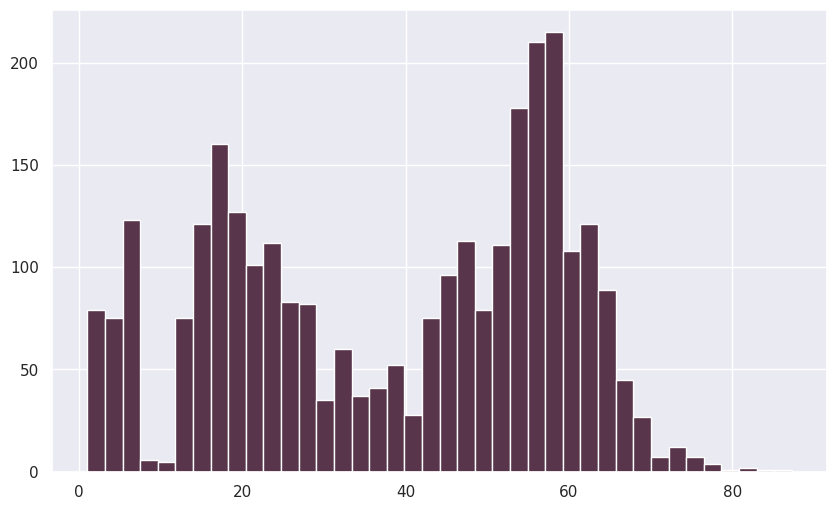

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=40)

In [58]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

## Cleam `under-five deaths` column

In [59]:
df['under-five deaths'].isna().sum()

0

In [60]:
df['under-five deaths'].value_counts()

under-five deaths
0       785
1       361
2       163
4       161
3       129
12       53
8        49
6        48
10       47
5        44
9        40
11       33
7        30
39       28
14       27
13       25
22       22
20       20
15       20
24       18
23       17
21       17
18       16
25       16
40       16
16       14
26       13
35       13
38       13
47       13
19       13
33       13
36       12
17       12
42       12
80       12
84       11
46       11
43       10
58       10
32       10
37       10
93       10
62        9
45        9
27        9
79        9
82        9
41        9
89        9
54        8
49        8
28        7
78        7
50        7
52        7
30        7
29        7
44        7
61        7
83        7
34        7
64        6
65        6
56        6
75        6
91        6
66        6
87        6
90        6
68        6
86        6
63        6
94        5
48        5
55        5
31        5
121       5
95        5
85        5
118       4
110       

<Axes: >

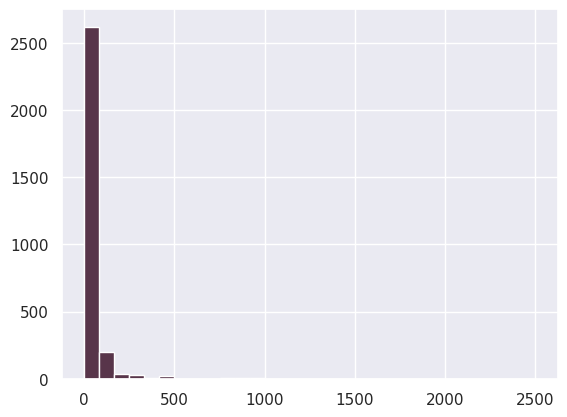

In [61]:
df['under-five deaths'].hist(bins=30)

## Clean `polio` column

In [62]:
df['polio'].value_counts()

polio
99.0    376
98.0    255
96.0    207
97.0    205
95.0    180
94.0    159
93.0    120
92.0     96
91.0     88
9.0      77
88.0     70
85.0     57
89.0     56
87.0     50
84.0     50
83.0     49
86.0     48
8.0      40
82.0     39
75.0     36
79.0     33
74.0     33
66.0     32
78.0     32
76.0     32
67.0     29
73.0     29
77.0     28
81.0     28
72.0     26
7.0      24
71.0     22
69.0     22
65.0     22
58.0     14
47.0     14
62.0     14
63.0     13
46.0     13
52.0     12
44.0     12
55.0     12
57.0     11
54.0     11
61.0     11
4.0      11
49.0     11
6.0      11
68.0     11
56.0     10
64.0      8
5.0       8
42.0      7
3.0       7
59.0      7
45.0      7
41.0      7
38.0      6
51.0      5
37.0      4
36.0      4
43.0      4
31.0      4
26.0      3
53.0      3
35.0      2
48.0      2
32.0      2
39.0      2
24.0      2
17.0      1
23.0      1
33.0      1
Name: count, dtype: int64

In [63]:
df['polio'].isna().sum()

0

<Axes: >

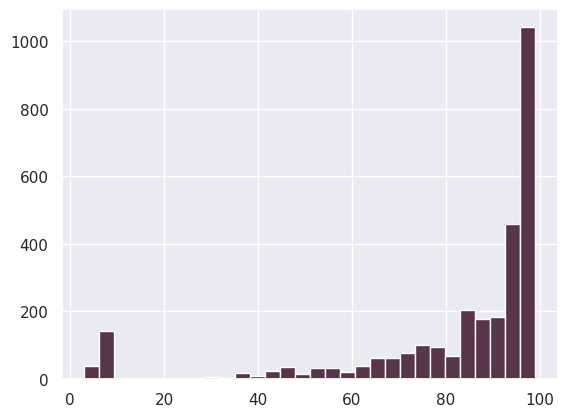

In [64]:
df['polio'].hist(bins=30)

## Clean `total expenditure` column

In [65]:
df['total expenditure'].value_counts()

total expenditure
4.60     15
2.77     14
6.70     12
5.60     11
5.90     10
3.40     10
5.25     10
5.30     10
9.10     10
5.64     10
8.90      9
5.82      9
5.92      9
6.88      9
4.20      9
4.26      9
6.10      9
7.10      9
5.29      9
4.41      9
4.47      9
4.70      9
4.36      9
5.17      9
5.40      9
6.40      9
3.80      8
5.84      8
7.80      8
3.61      8
5.26      8
5.91      8
6.39      8
5.70      8
3.70      8
4.40      8
5.81      8
5.61      8
6.90      8
4.73      8
5.21      8
4.24      8
4.34      8
8.20      8
4.22      8
8.50      8
7.43      8
4.48      8
6.30      7
4.98      7
7.44      7
8.18      7
4.29      7
4.30      7
8.30      7
6.41      7
5.72      7
6.35      7
8.80      7
5.37      7
4.92      7
5.67      7
5.56      7
4.56      7
5.10      7
7.53      7
6.93      7
6.20      7
4.69      7
6.83      7
6.60      7
7.50      6
4.28      6
3.73      6
7.12      6
6.14      6
1.87      6
5.58      6
4.82      6
4.86      6
5.66      6
6.11      

In [66]:
df['total expenditure'].isna().sum()

211

In [67]:
df['total expenditure'].interpolate(method='linear', inplace=True)


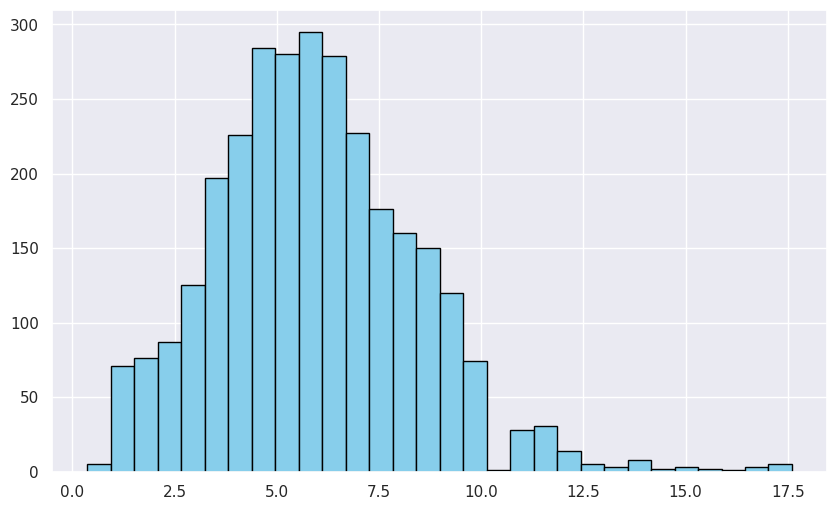

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df['total expenditure'], bins=30, color='skyblue', edgecolor='black')



# Display the plot
plt.show()

### it can be considered as ***normally distributed***

## Clean `diphtheria` column

In [69]:
df['diphtheria'].value_counts()

diphtheria
99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
94.0    149
93.0    120
92.0    100
91.0     91
89.0     76
9.0      73
87.0     61
88.0     58
85.0     53
86.0     49
84.0     48
82.0     46
78.0     45
83.0     42
8.0      39
81.0     37
79.0     35
73.0     34
77.0     31
75.0     31
72.0     27
74.0     27
64.0     25
76.0     23
7.0      21
65.0     21
61.0     19
71.0     19
68.0     19
62.0     18
69.0     18
67.0     17
6.0      16
45.0     16
63.0     14
4.0      12
41.0     11
5.0      10
42.0     10
59.0     10
66.0     10
57.0     10
54.0      9
49.0      8
53.0      8
39.0      7
51.0      6
46.0      6
52.0      6
55.0      6
33.0      6
58.0      5
47.0      5
38.0      5
36.0      5
35.0      4
37.0      4
3.0       4
43.0      4
23.0      4
44.0      4
48.0      4
31.0      4
25.0      3
26.0      3
24.0      3
34.0      3
29.0      2
28.0      2
32.0      1
21.0      1
19.0      1
56.0      1
16.0      1
2.0       1
27.0      1
Name: count, dtyp

In [70]:
df['diphtheria'].isna().sum()

0

<Axes: >

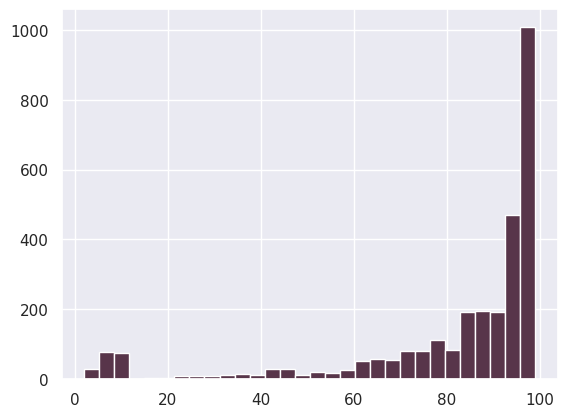

In [71]:
df['diphtheria'].hist(bins=30)

## Clean `hiv/aids` column

In [72]:
df['hiv/aids'].isna().sum()

0

In [73]:
df['hiv/aids'].value_counts()

hiv/aids
0.1     1781
0.2      124
0.3      115
0.4       69
0.5       42
0.6       35
0.8       32
0.9       32
0.7       29
1.6       21
1.5       21
2.1       20
1.9       19
1.2       18
2.0       17
1.1       15
1.4       15
2.3       15
1.3       14
2.2       12
1.7       12
2.4       12
1.0       12
5.1       12
3.0       12
2.5       12
3.1       11
5.0       10
1.8        9
2.8        9
2.9        9
3.7        9
4.3        8
5.3        8
3.9        8
4.1        8
2.6        7
4.6        7
3.5        7
4.9        7
4.4        7
3.2        7
3.6        7
3.3        7
2.7        7
4.8        7
6.3        6
4.0        6
5.2        6
4.2        5
3.8        5
3.4        5
10.0       4
7.7        4
5.4        4
6.8        4
13.4       4
6.2        4
5.9        3
4.7        3
9.4        3
8.5        3
8.1        3
15.7       3
5.7        3
7.3        3
6.0        3
4.5        3
8.0        3
5.5        3
7.2        3
9.0        3
10.8       3
7.1        3
7.0        3
7.6        2
6.4

<Axes: >

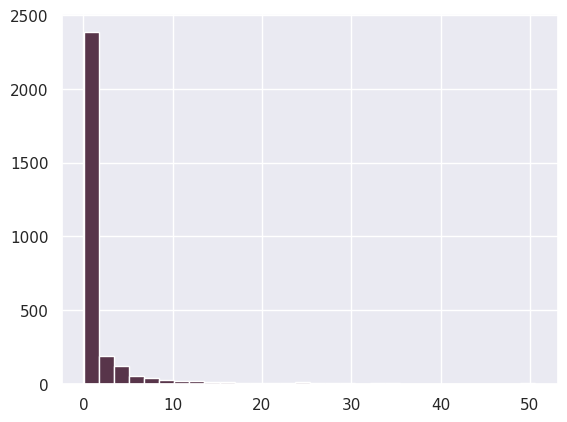

In [74]:
df['hiv/aids'].hist(bins=30)

## clean `gdp` column

In [75]:
df['gdp'].value_counts()

gdp
47.543235        14
1678.711862       9
1391.816923       5
51.216381         2
116.274300        1
358.997310        1
43.646498         1
416.148380        1
391.515524        1
375.581987        1
348.151511        1
341.289462        1
143.675800        1
292.559620        1
258.463873        1
25.383731         1
232.566157        1
215.854800        1
177.828384        1
165.257247        1
354.818600        1
16874.312320      1
13882.856830      1
13641.127200      1
295.966488        1
1975.464770       1
1847.198490       1
1792.384500       1
1682.957924       1
11.147277         1
1464.497754       1
1518.853860       1
1344.318710       1
124.992617        1
1175.116225       1
191.551570        1
115.565314        1
158.455972        1
1526.497938       1
1574.986100       1
87646.753460      1
817.776810        1
9688.596100       1
85128.657590      1
74114.697150      1
66775.394400      1
5757.269160       1
2655.157977       1
4361.153800       1
38549.589340    

In [76]:
df['gdp'].isna().sum()

422

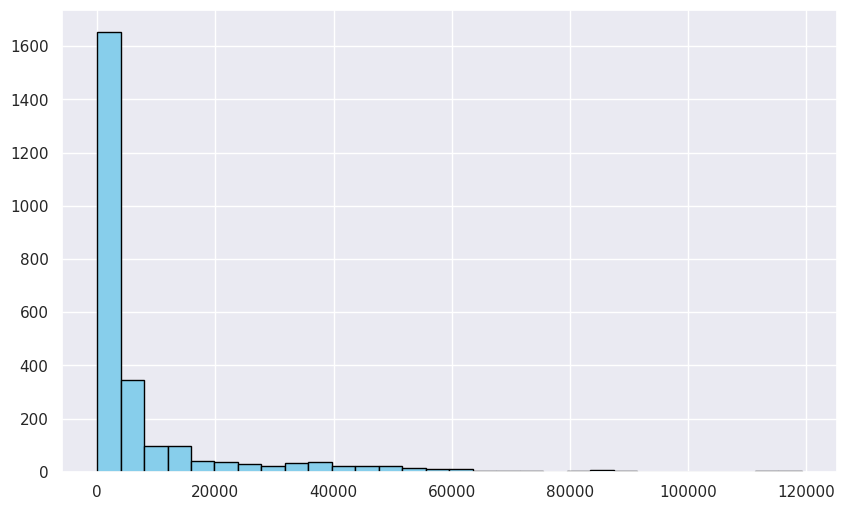

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(df['gdp'], bins=30, color='skyblue', edgecolor='black')


# Display the plot
plt.show()

In [78]:
df['gdp'].interpolate(method='linear', inplace=True)

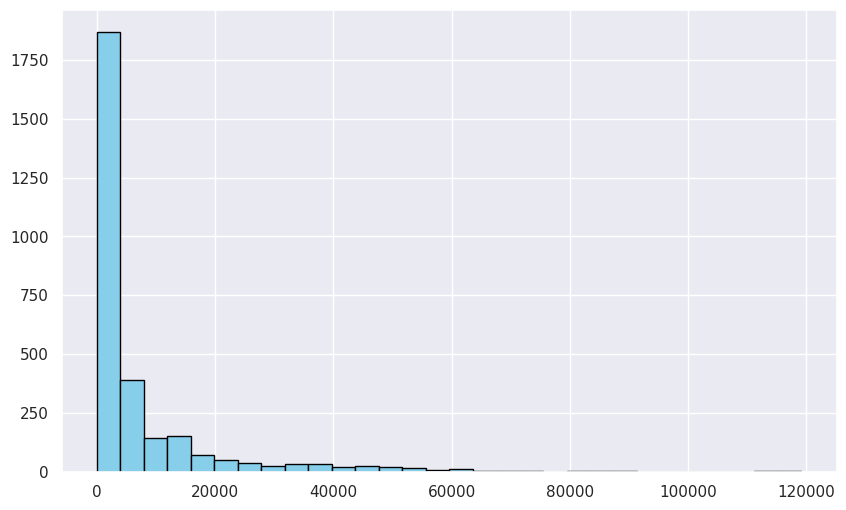

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(df['gdp'], bins=30, color='skyblue', edgecolor='black')


# Display the plot
plt.show()

#### the distribution doesn't affected alot .

## clean `population` column

In [80]:
df['population'].value_counts()

population
4.440000e+02    4
2.920000e+02    2
7.182390e+05    2
1.141000e+03    2
1.274450e+05    2
2.686800e+04    2
1.764636e+06    1
1.642558e+07    1
1.581391e+07    1
1.522852e+07    1
1.466834e+07    1
1.413264e+06    1
1.361845e+07    1
1.773163e+07    1
1.265687e+06    1
1.226200e+04    1
1.177198e+07    1
1.135297e+07    1
1.811817e+08    1
1.764652e+06    1
1.312712e+06    1
5.877180e+05    1
5.878200e+04    1
5.737723e+06    1
5.666581e+06    1
5.594560e+05    1
5.522160e+05    1
5.452110e+05    1
1.914822e+07    1
5.397300e+04    1
5.248790e+05    1
5.171734e+06    1
5.175000e+03    1
5.267960e+05    1
1.989696e+07    1
1.718293e+07    1
1.842637e+07    1
5.379328e+06    1
4.889252e+06    1
4.828726e+06    1
4.768212e+06    1
4.791530e+05    1
4.666770e+05    1
4.623291e+06    1
4.591910e+05    1
4.564855e+06    1
1.628778e+07    1
4.513751e+06    1
4.499670e+05    1
1.893851e+07    1
1.855463e+08    1
1.817126e+08    1
1.779115e+08    1
1.741843e+08    1
1.756182e+06    1

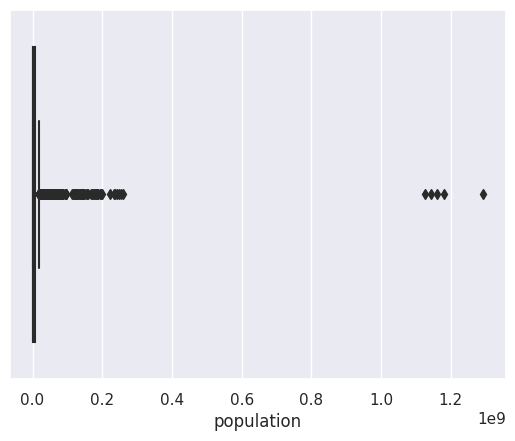

In [81]:
sns.boxplot(x=df['population'])

# Display the plot
plt.show()

In [82]:
df['population'].isna().sum()

652

In [83]:
Q1 = df['population'].quantile(0.25)
Q3 = df['population'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# handle outliers
df.loc[((df['population'] < lower_bound) | (df['population'] > upper_bound) ), 'population'] = np.nan



In [84]:
df['population'].isna().sum()

946

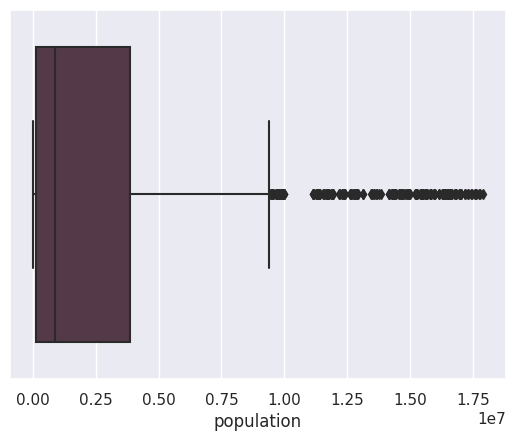

In [85]:
sns.boxplot(x=df['population'])

# Display the plot
plt.show()

In [86]:
# First, forward and backward fill any missing values that can't be interpolated
df['population'].fillna(method='ffill', inplace=True)
df['population'].fillna(method='bfill', inplace=True)

# Then apply linear interpolation to the rest of the missing values
df['population'].interpolate(method='linear', inplace=True)

# Check if any missing values remain
print(df['population'].isna().sum())


0


## Clean`schooling` column

In [87]:
df['schooling'].isna().sum()

163

In [88]:
df['schooling'].value_counts()

schooling
12.9    58
13.3    52
12.5    49
12.8    46
12.3    44
12.6    43
12.4    42
10.7    41
11.9    41
12.7    40
11.7    40
12.1    38
15.8    38
11.6    37
13.5    36
13.2    34
14.2    34
13.1    34
11.4    33
11.1    33
11.8    33
13.4    33
13.0    32
10.6    32
12.2    31
14.4    30
10.0    30
15.3    30
15.0    29
12.0    29
14.6    29
10.8    29
13.8    29
10.4    29
10.3    29
13.9    29
14.0    28
0.0     28
15.9    27
11.0    27
14.3    27
11.5    27
13.6    25
10.2    25
13.7    25
10.5    24
15.4    24
14.7    24
16.3    24
10.1    24
9.2     23
10.9    23
9.6     23
9.1     23
15.7    23
15.2    22
15.5    22
9.8     22
8.4     21
14.1    21
14.9    20
14.8    20
15.1    20
11.3    20
14.5    19
8.2     19
16.5    19
11.2    18
8.5     18
16.0    18
9.7     17
9.9     17
8.9     17
8.0     17
9.0     17
16.4    17
16.1    16
9.3     16
9.4     16
8.1     16
15.6    16
16.8    15
7.7     15
16.2    14
7.6     14
9.5     14
8.6     14
8.8     13
7.3     13
8.7     13


<Axes: >

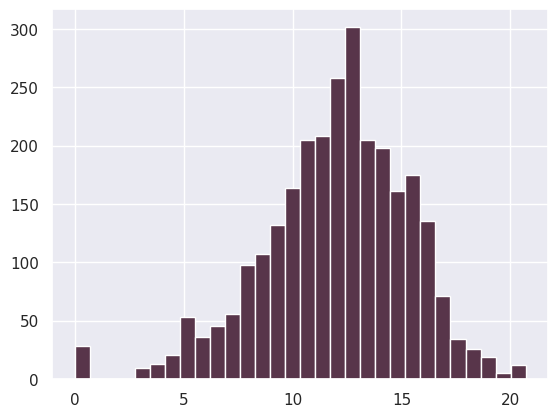

In [89]:
df['schooling'].hist(bins=30)

In [90]:
df['schooling'].fillna(df['schooling'].median(), inplace=True)

## Clean `thinness` column

In [91]:
df['thinness'].isna().sum()

34

In [92]:
df['thinness'].value_counts()

thinness
0.95     49
2.05     40
0.60     39
1.10     39
1.15     32
1.30     32
0.20     31
1.75     30
1.55     30
0.10     28
2.25     28
2.10     28
0.75     28
3.30     28
1.35     27
1.00     27
1.90     27
1.25     27
1.45     26
1.85     26
0.70     26
2.20     25
0.65     25
3.45     25
1.95     25
1.65     24
1.50     24
2.45     23
0.90     23
1.40     22
1.20     21
2.15     21
0.55     21
2.00     20
0.50     20
2.40     20
3.80     20
3.25     20
1.60     20
0.85     19
6.45     19
2.55     19
0.80     19
5.50     19
2.35     19
2.50     19
1.80     18
3.35     18
2.70     18
3.40     18
2.80     18
3.50     18
2.30     18
0.30     18
3.55     17
6.35     17
5.35     17
3.90     16
3.10     16
2.85     15
7.25     15
1.70     15
6.50     15
7.90     14
0.25     14
7.45     14
0.45     14
6.85     14
6.25     14
6.00     14
3.65     13
2.75     13
6.60     13
7.65     13
5.90     12
1.80     12
2.60     12
7.00     12
5.95     11
5.00     11
6.90     11
6.40     11
4.65   

<Axes: >

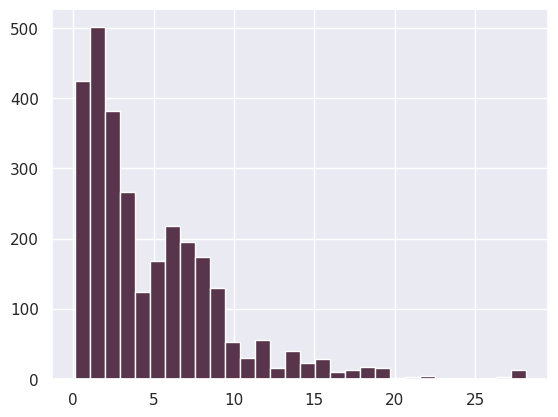

In [93]:
df['thinness'].hist(bins=30)

In [94]:
df['thinness'].fillna(df['thinness'].median(), inplace=True)

## clean `life expectancy` column (target)

In [95]:
df['life expectancy'].value_counts()

life expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
81.0    25
76.0    25
74.5    24
74.7    24
74.4    23
74.9    23
73.5    23
73.2    23
74.2    23
74.1    23
73.8    22
77.0    22
72.0    21
74.0    21
82.0    21
75.4    21
73.3    21
72.7    21
74.6    20
72.6    20
68.0    20
73.4    19
72.8    19
73.7    19
79.0    19
72.9    19
71.0    19
74.8    18
72.5    18
73.1    18
81.1    17
71.4    16
75.3    16
75.6    16
71.7    16
72.2    16
83.0    16
78.7    16
75.2    15
71.8    15
69.4    15
86.0    15
69.0    14
71.9    14
72.4    14
72.3    14
71.6    14
75.8    14
72.1    13
55.0    13
71.2    13
65.0    13
74.3    13
79.3    13
75.5    13
63.0    12
79.4    12
85.0    12
62.0    12
67.0    12
58.0    12
68.5    12
78.9    12
76.2    12
78.1    12
67.7    11
77.5    11
79.7    11
81.7    11
67.5    11
78.8    11
64.0    11
84.0    11
79.8    11
69.9    11
67.3    11
55.3    11
76.6    11
76.1    11
89.0    11
68.3    11
80.0    11
66.0    11
71.1    11
59.7 

In [96]:
df['life expectancy'].isna().sum()

10

In [97]:
df['life expectancy'].fillna(df['life expectancy'].median(), inplace=True)

## Check !!!!

In [98]:
df.isna().sum() / len(df) * 100.0

country              0.0
year                 0.0
status               0.0
life expectancy      0.0
adult mortality      0.0
alcohol              0.0
hepatitis b          0.0
measles              0.0
bmi                  0.0
under-five deaths    0.0
polio                0.0
total expenditure    0.0
diphtheria           0.0
hiv/aids             0.0
gdp                  0.0
population           0.0
schooling            0.0
thinness             0.0
dtype: float64

# Visualization Trip

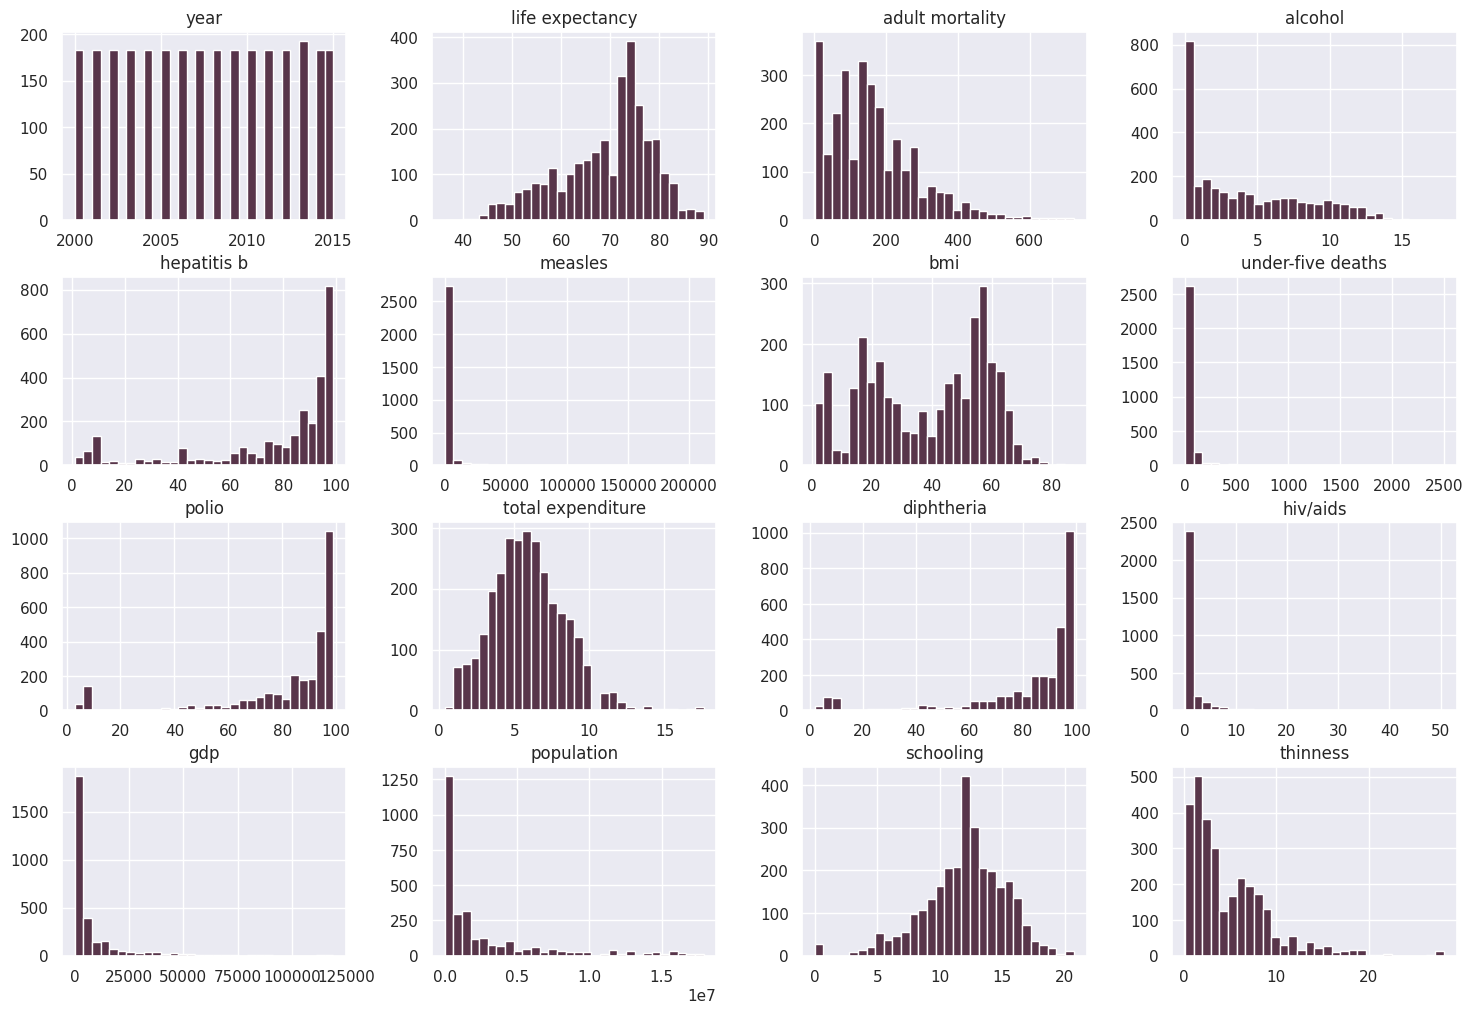

In [99]:
df.hist(bins=30, figsize=(18, 12))
plt.show()

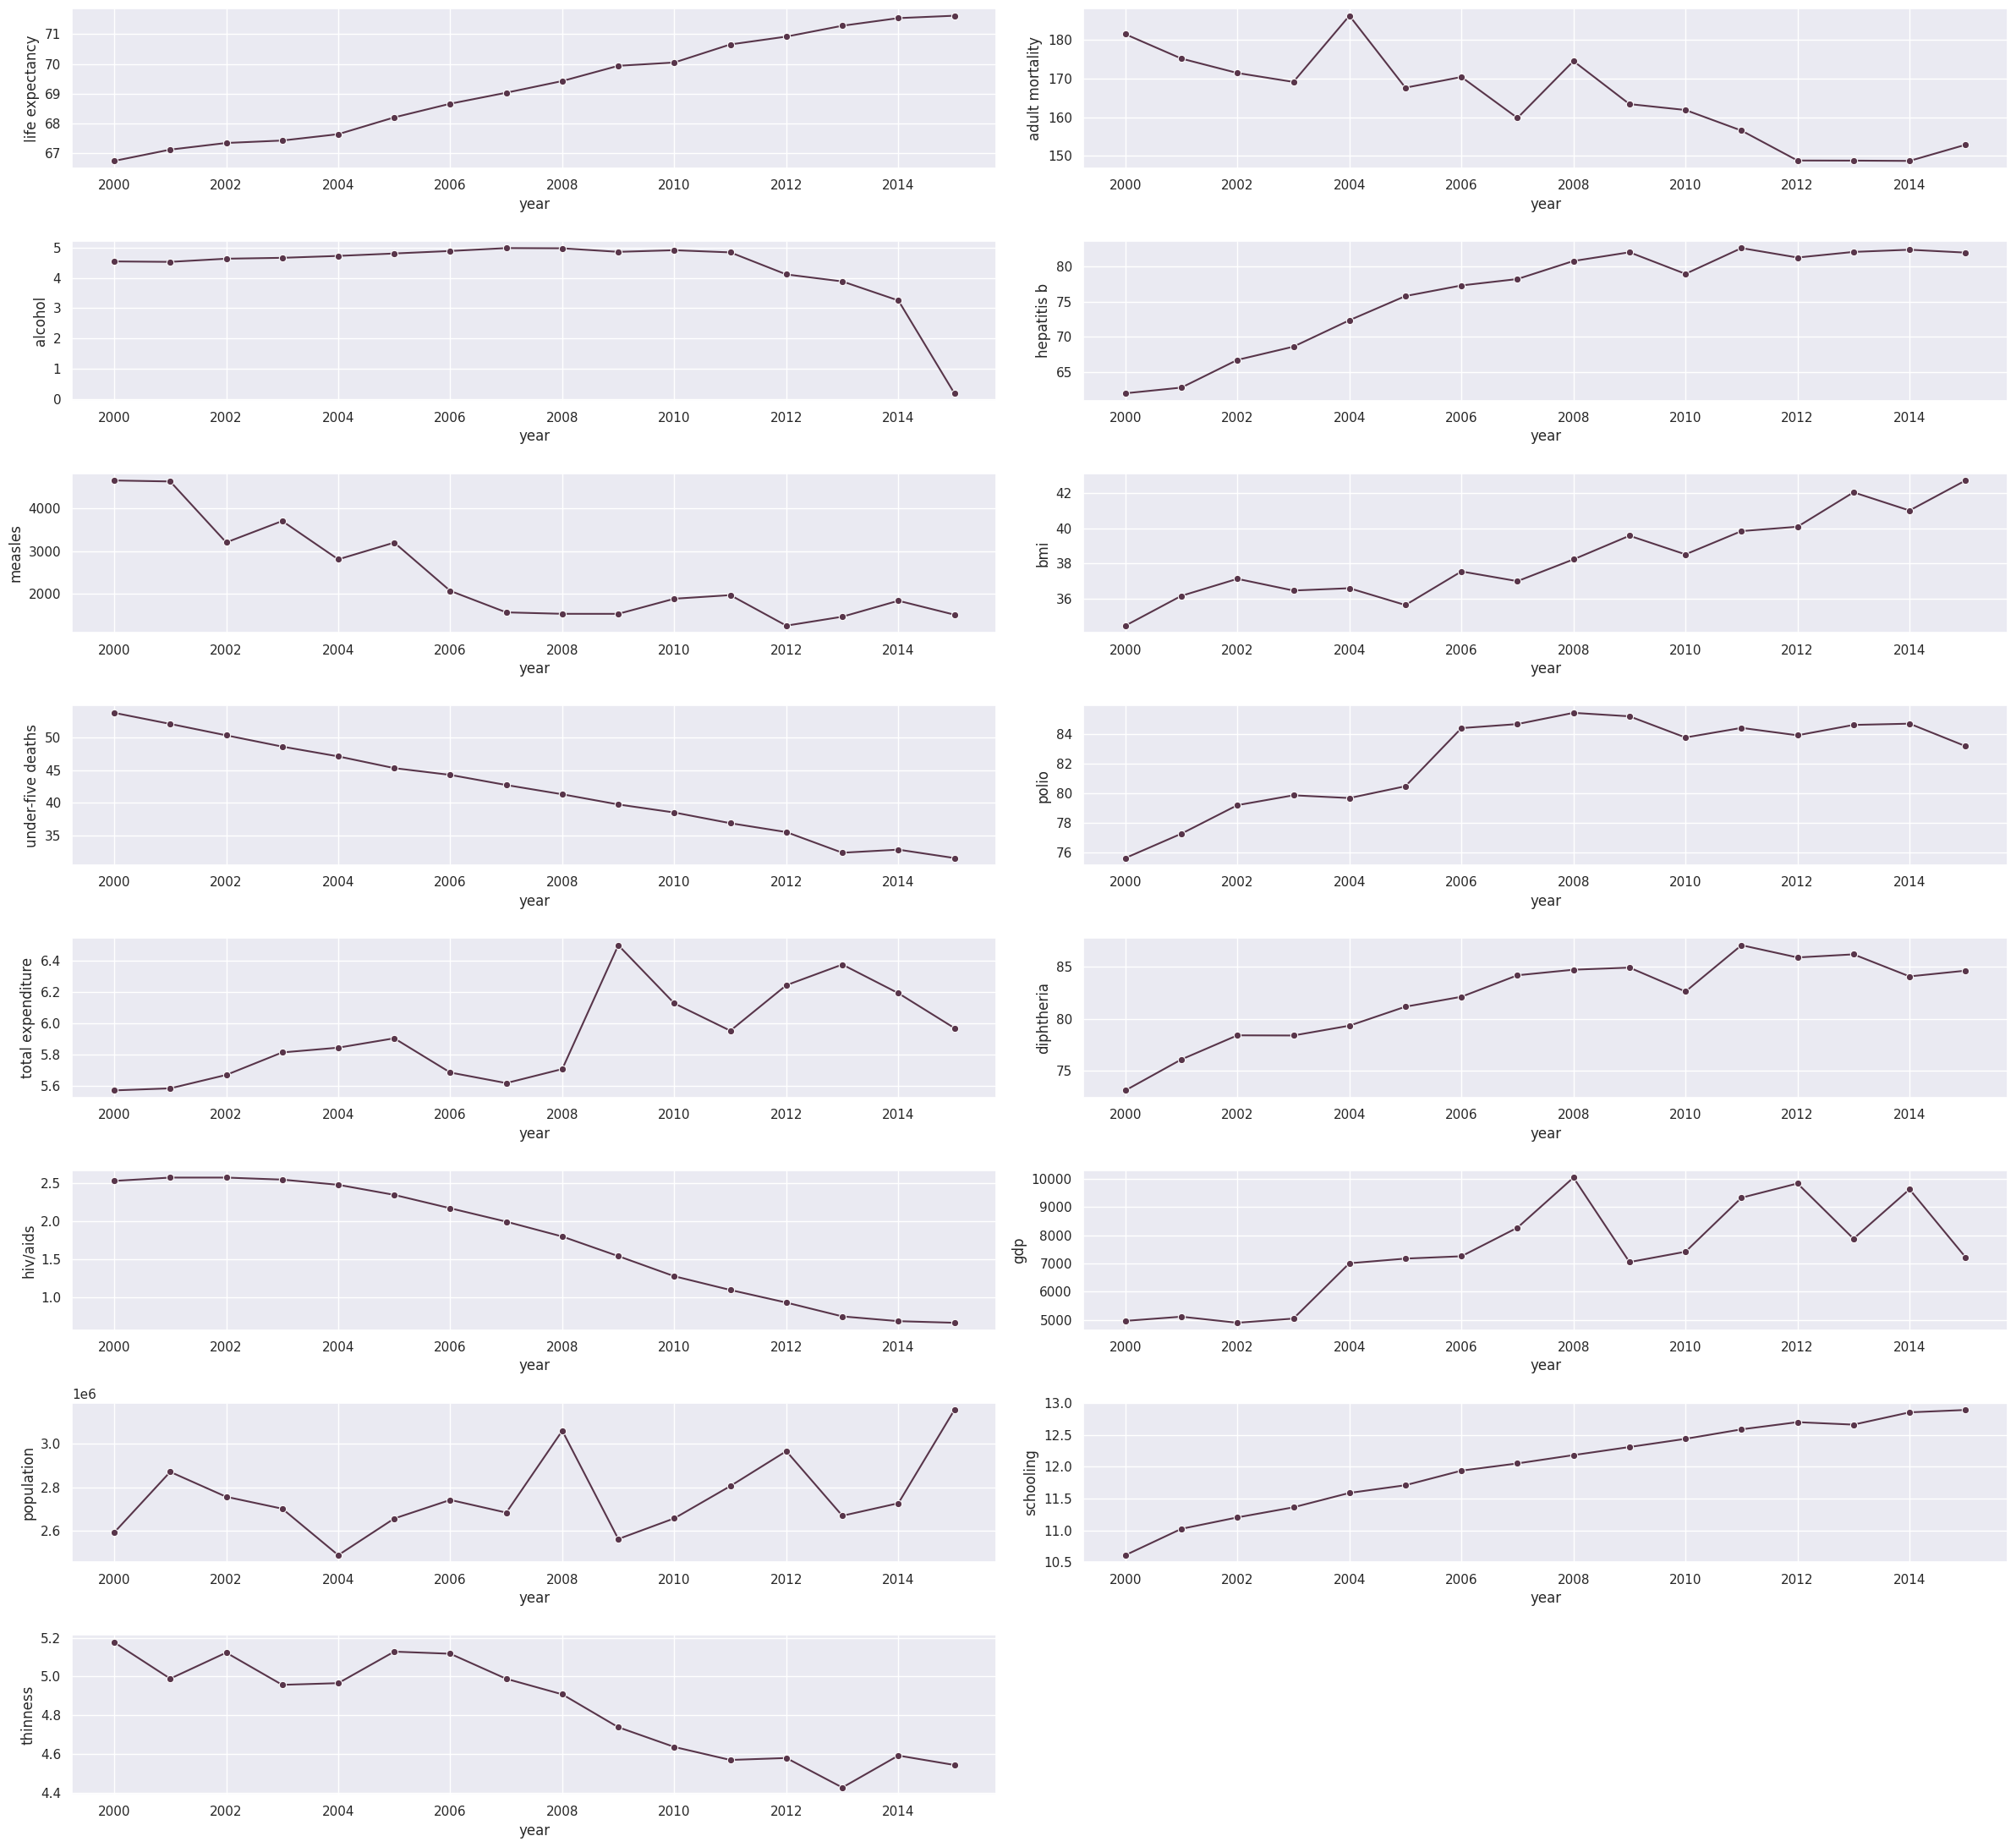

In [100]:
cols_numeric = df.select_dtypes("number").columns

fig,axes=plt.subplots(nrows=len(df[cols_numeric].columns)//2 ,ncols=2,figsize=(24,22))
for i,col in enumerate(df[cols_numeric].drop(columns='year').columns):
    row_idx=i//2
    col_idx=i%2
    sns.lineplot(x='year',y=df[col],data=df,ax=axes[row_idx,col_idx],markers=True,ci=None,  marker='o', linestyle='-')
fig.delaxes(axes[7,1])
plt.tight_layout()
plt.show()

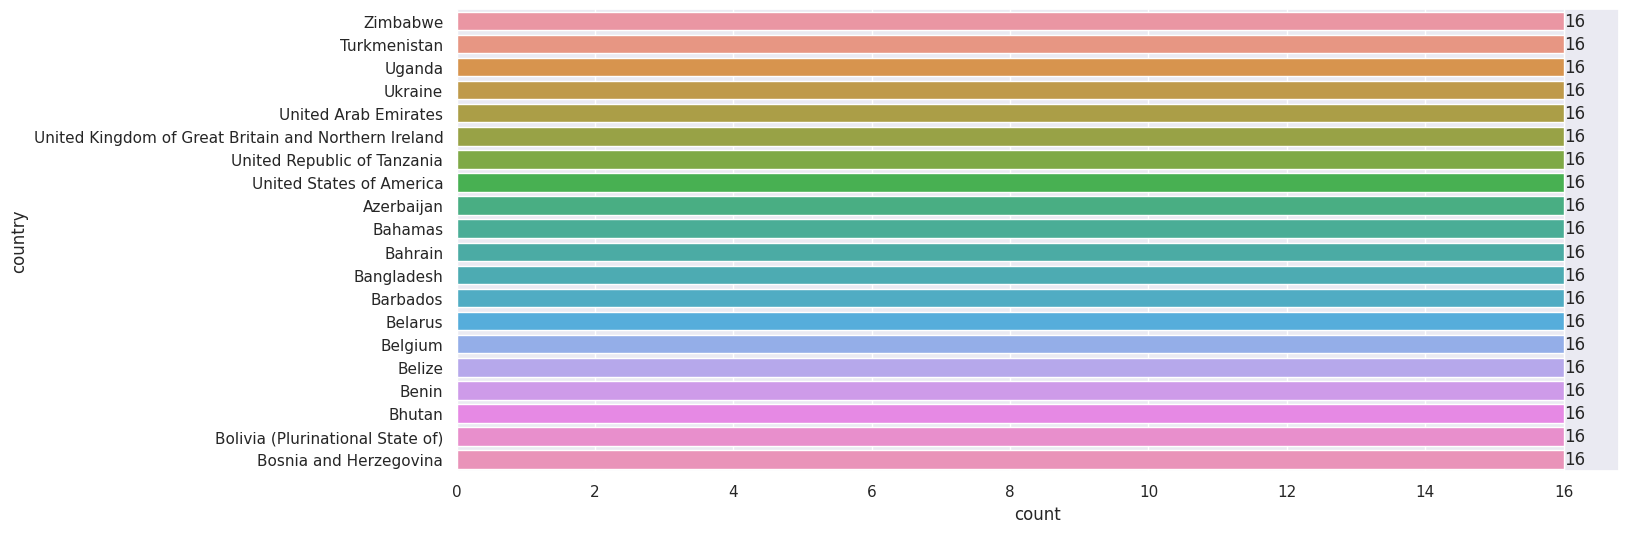

In [101]:
# see top 20 country

# first set figure size
plt.figure(figsize = (15,6))


graph = sns.countplot(y = 'country', data = df, order = df['country'].value_counts().iloc[:20].index, )
for container in graph.containers:
    graph.bar_label(container)

plt.show()


### Bivariate analysis

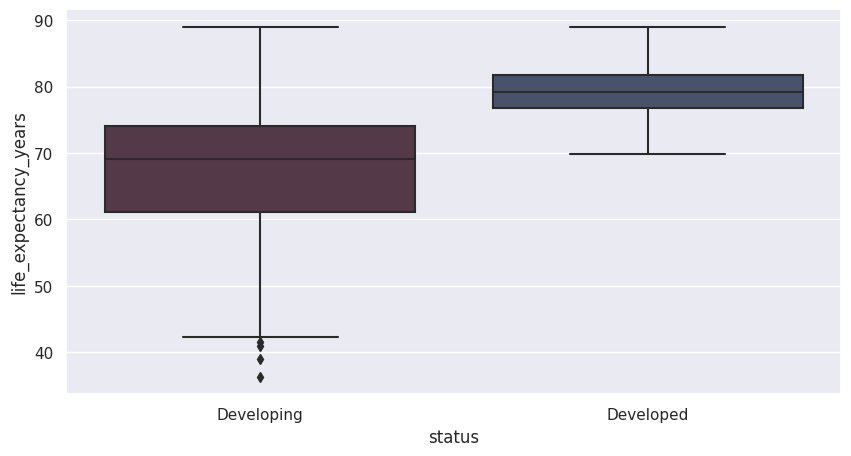

In [102]:
# see the impact of "status" on "Life Expectancy"

plt.figure(figsize=(10,5))

sns.boxplot(x = 'status', y = 'life expectancy', data = df)
plt.xlabel('status')
plt.ylabel("life_expectancy_years")
plt.show()

In [103]:
# see the impact of "nation" on "Life Expectancy"

def country_Life_expectancy(reversed, top = None):
    return df.groupby("country")["life expectancy"].median().sort_values(ascending = reversed).reset_index().head(top)

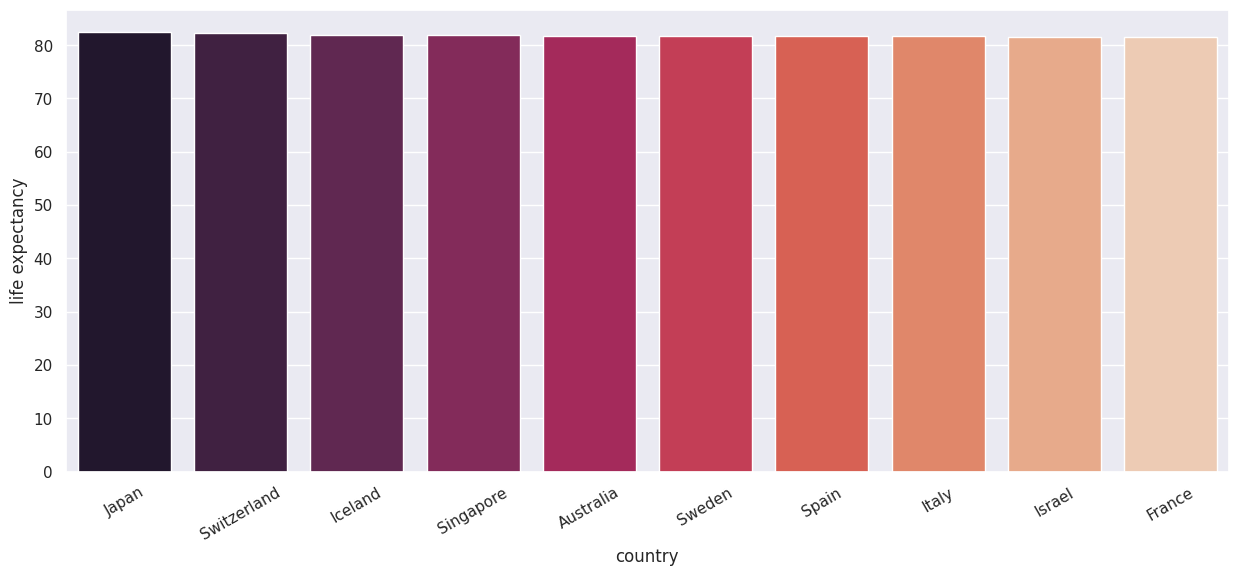

In [104]:
# see top 10 country of Life Expectancy

country = country_Life_expectancy(reversed = False, top = 10)

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x = 'country', y = 'life expectancy', data = country, palette='rocket')

plt.xticks(rotation = 30)

# Show the plot
plt.show()

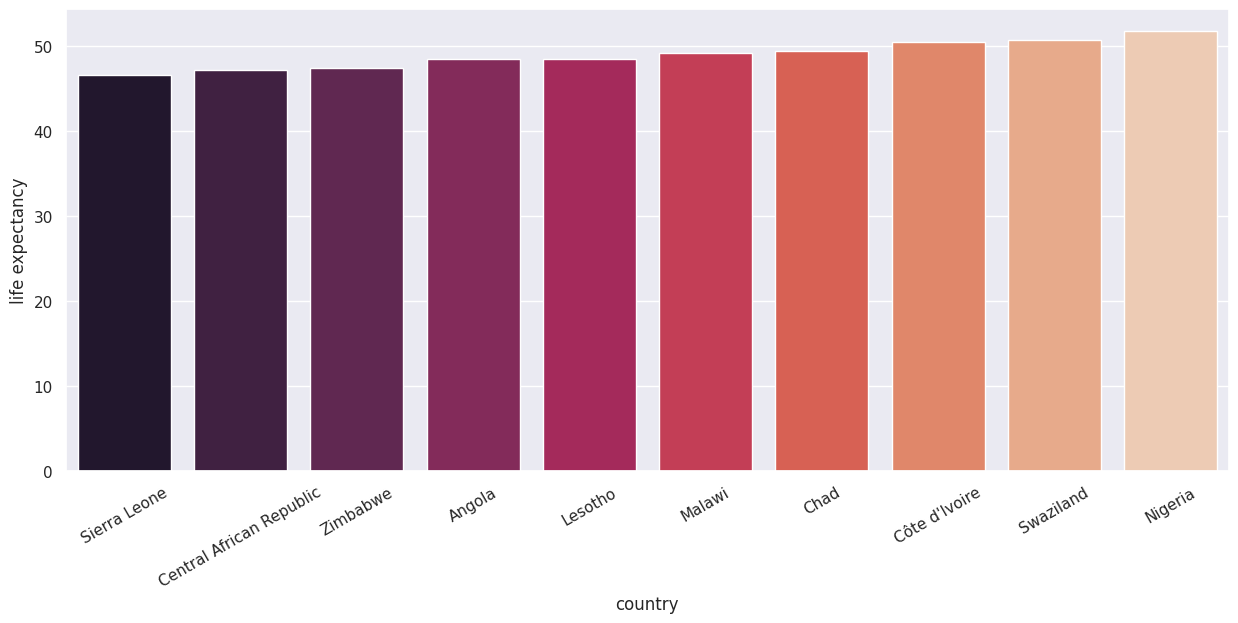

In [105]:
# see Lows 10 country of Life Expectancy

country = country_Life_expectancy(reversed = True, top = 10)

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x = 'country', y = 'life expectancy', data = country, palette='rocket')

plt.xticks(rotation = 30)

# Show the plot
plt.show()

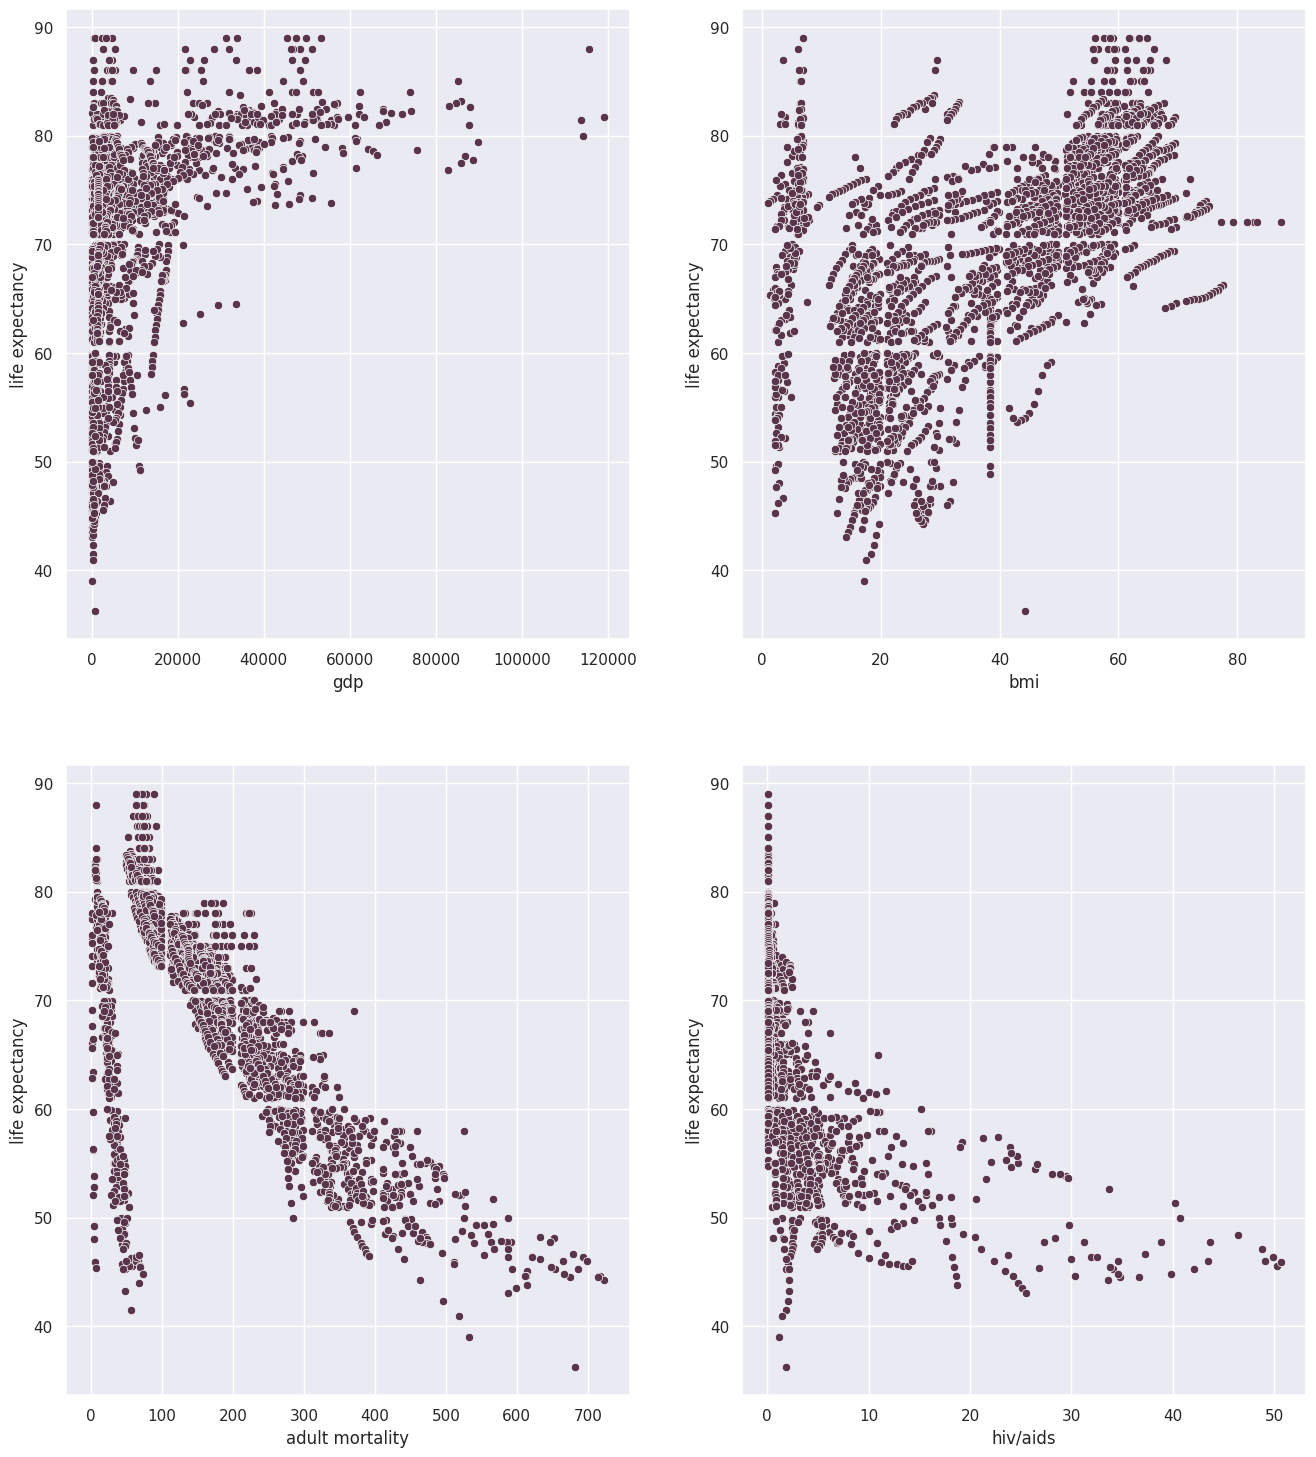

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(16, 18))

sns.scatterplot(data=df, y='life expectancy', x='gdp', ax=axes[0, 0])

sns.scatterplot(data=df, y='life expectancy', x='bmi', ax=axes[0, 1])

sns.scatterplot(data=df, y='life expectancy', x='adult mortality', ax=axes[1, 0])

sns.scatterplot(data=df, y='life expectancy', x='hiv/aids', ax=axes[1, 1])

plt .show()

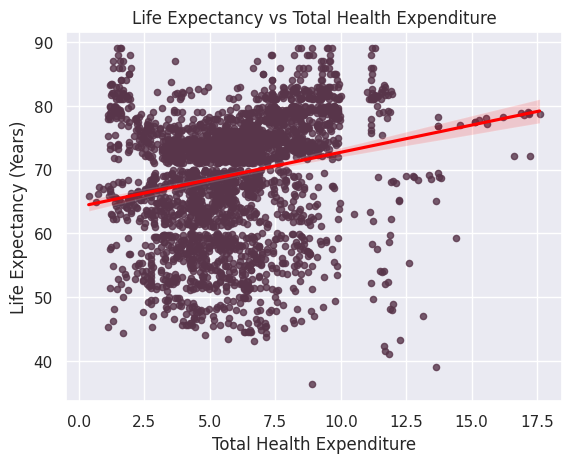

In [107]:
# Line plot with regression line
sns.regplot(data=df, x='total expenditure', y='life expectancy', scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Title and labels
plt.title('Life Expectancy vs Total Health Expenditure')
plt.xlabel('Total Health Expenditure')
plt.ylabel('Life Expectancy (Years)')

# Show plot
plt.show()

In [108]:
df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'alcohol', 'hepatitis b', 'measles', 'bmi', 'under-five deaths',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp',
       'population', 'schooling', 'thinness'],
      dtype='object')

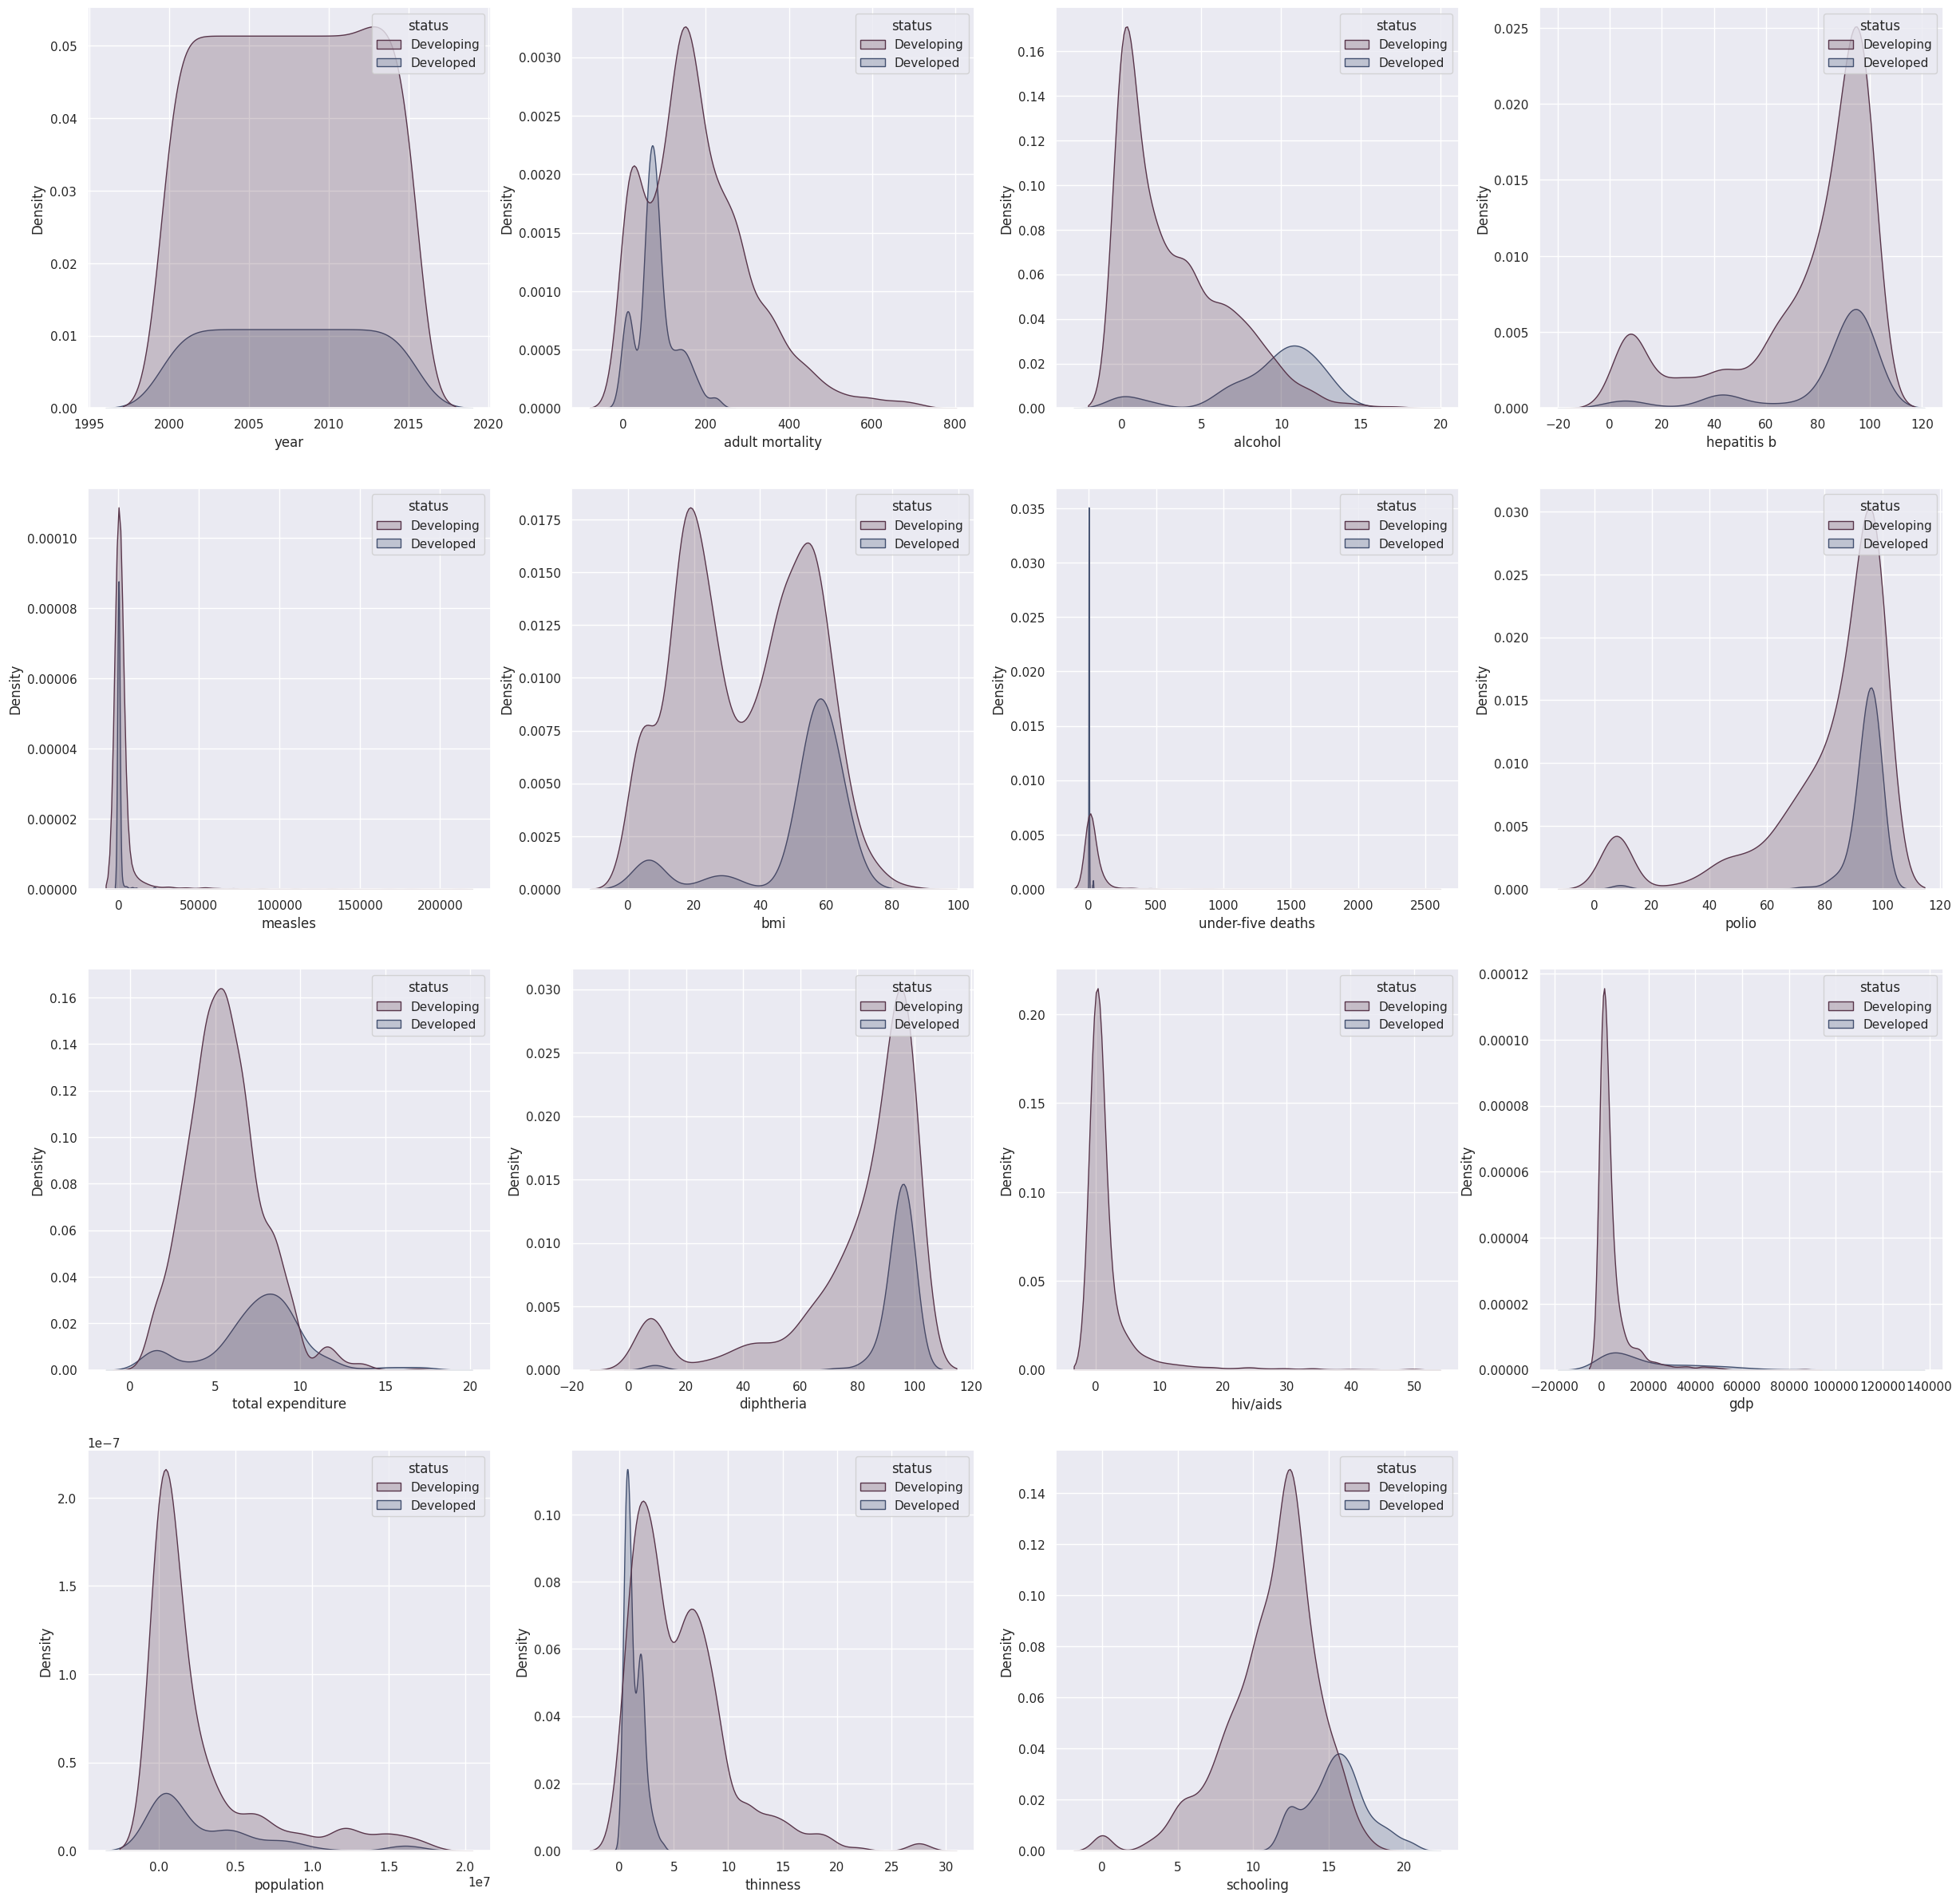

In [109]:
cols_numeric = [
    'year',
    'adult mortality',
    'alcohol',
    'hepatitis b',
    'measles',
    'bmi',
    'under-five deaths',
    'polio',
    'total expenditure',
    'diphtheria',
    'hiv/aids',
    'gdp',
    'population',
    'thinness',
    'schooling'
]

fig = plt.figure(figsize=(30,30))

for i in range(len(cols_numeric)):
    plt.subplot(4,4,i+1)
    graph = sns.kdeplot(x=cols_numeric[i], data=df, fill=True, hue='status')

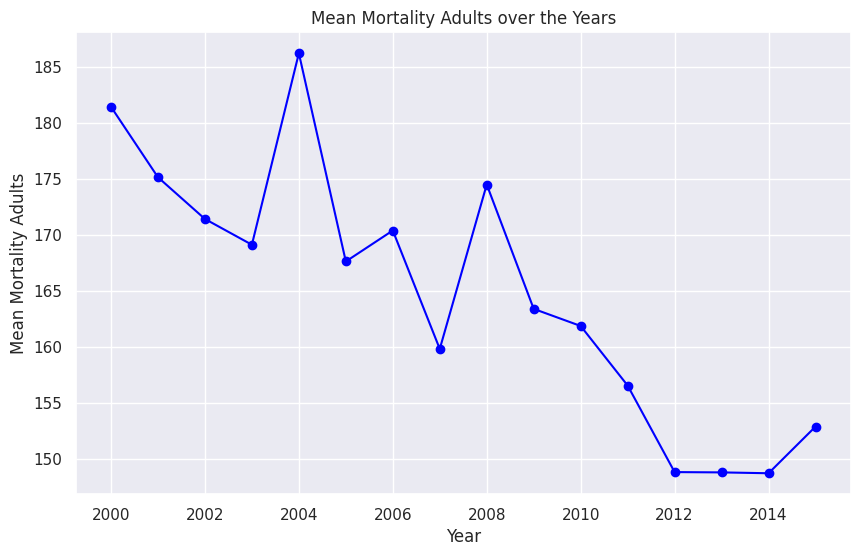

In [110]:
mean_mortality = df.groupby('year')['adult mortality'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_mortality['year'], mean_mortality['adult mortality'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Mortality Adults')
plt.title('Mean Mortality Adults over the Years')

# Show the plot
plt.show()

* 1- the adult mortality in `2004` is soo high
* 2- it decreased alot between `2011` to `2015`

# Health Data Report: Analysis on Key Health Indicators

## Data Overview

This report provides an analysis of the health data focusing on the relationships between key indicators such as life expectancy, mortality rates, vaccination coverage, health expenditure, and economic data. The following features were selected for analysis:

- **Nation**  
- **Survey Year**  
- **Country Category**  
- **Adult Mortality Rate**  
- **Infant Deaths Count**  
- **Alcohol Consumption Rate**  
- **Hepatitis B Vaccination Coverage**  
- **Measles Infection Count**  
- **Body Mass Index (BMI) Average**  
- **Polio Vaccination Coverage**  
- **Total Health Expenditure**  
- **Diphtheria Vaccination Coverage**  
- **HIV/AIDS Prevalence Rate**  
- **Gross Domestic Product (GDP)**  
- **Total Population**  
- **Life Expectancy (Years)**  

---

## Key Insights from the Data

### 1. Relationship between Health Indicators and Life Expectancy

- **Positive Relationships**:  
  - As the Gross Domestic Product (GDP) and Total Health Expenditure increase, life expectancy tends to increase. This suggests that greater economic resources and higher investments in healthcare are associated with better overall health outcomes.  
  - As Body Mass Index (BMI) and Schooling increase, life expectancy also shows an upward trend, indicating the role of improved nutrition and education in overall health.  

- **Negative Relationships**:  
  - Adult Mortality and HIV/AIDS Prevalence Rate show a negative relationship with life expectancy. As these factors increase, life expectancy tends to decrease, highlighting the significant impact of adult health and disease burden on the population's longevity.  

### 2. Health and Vaccination Indicators

- **Infant Deaths and Under-Five Deaths**:  
  A strong relationship is observed between infant deaths and under-five deaths, suggesting that improvements in infant health are crucial for reducing early childhood mortality.  

- **Vaccination Coverage**:  
  Increased coverage in Polio, Diphtheria, and Hepatitis B vaccinations corresponds with improvements in health outcomes. These vaccinations are directly linked to reductions in infectious diseases, which in turn support higher life expectancy.  

### 3. Socioeconomic Factors and Their Impact

- **Country Categories**:  
  Developing countries generally have larger populations compared to developed countries. However, life expectancy tends to be lower in developing countries. In these countries, life expectancy ranges between 70-80 years, whereas developed countries tend to have higher life expectancy, ranging between 75-85 years.  

- **Income Composition of Resources and Schooling**:  
  These factors are strongly correlated with improved health outcomes. As income levels and educational resources increase, so does life expectancy.  

### 4. Trends Over Time

- The year 2015 stands out as a year with notably higher life expectancy values compared to other years, reflecting potential improvements in healthcare and global health initiatives during this period.  

### 5. Outliers and Missing Data

- Several features contained outliers, which were handled by replacing the outliers with null values. These null values were then processed, ensuring the data is clean and ready for analysis.  

---

## Conclusion

The analysis of the selected features reveals clear patterns in how socioeconomic, health, and demographic factors influence life expectancy. Key takeaways include:

- Higher economic and health expenditure contribute positively to life expectancy.  
- Adult mortality rates and HIV/AIDS prevalence are significant negative factors.  
- Improved vaccination coverage and better nutrition play a critical role in enhancing population health.  
- Developing countries are generally larger but show lower life expectancy than developed countries.  
- The year 2015 saw a notable increase in life expectancy, possibly due to global healthcare improvements.  

By focusing on these key health indicators, this report underscores the importance of continued investment in healthcare, education, and economic development to improve global health outcomes.


# Modeling Trip

In [111]:
df_final = df.copy()

In [112]:
df_final.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'alcohol', 'hepatitis b', 'measles', 'bmi', 'under-five deaths',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp',
       'population', 'schooling', 'thinness'],
      dtype='object')

## Preprocessing

In [113]:
numeric_columns = ['year', 'adult mortality',
       'alcohol', 'hepatitis b', 'measles', 'bmi', 'under-five deaths',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp',
       'population', 'schooling', 'thinness']

cat_columns = ['country', 'status']

In [114]:
X, Y = df_final.drop(columns=['life expectancy']), df_final['life expectancy']

In [115]:
def detect_skewness(dataframe, threshold=0.5):
    """
    Detects left or right skewed columns in a pandas DataFrame.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to analyze.
    threshold (float): The threshold for considering a column as skewed.
                      Default is 0.5.

    Returns:
    skewed_columns (list): A list of column names that are skewed.
    """
    skewed_columns = []

    for column in dataframe.columns:
        skewness = dataframe[column].skew()
        if abs(skewness) > threshold:
            skewed_columns.append((column, skewness))

    return skewed_columns

In [116]:
skewed_cols = detect_skewness(X[numeric_columns])
print("Skewed columns:", skewed_cols)


Skewed columns: [('adult mortality', 1.1775839919807127), ('alcohol', 0.6691587816249812), ('hepatitis b', -1.4090867946489238), ('measles', 9.441331947061585), ('under-five deaths', 9.495064656961773), ('polio', -2.0664035572457733), ('total expenditure', 0.624391242905039), ('diphtheria', -2.0395318151832313), ('hiv/aids', 5.396112042126371), ('gdp', 3.3122242473420194), ('population', 1.937980012663541), ('schooling', -0.6350516288526808), ('thinness', 1.7622295612053522)]


### Custom Transformers

In [117]:
class DataFrameImputer(TransformerMixin, BaseEstimator):
    """
    A class to impute missing values in a Pandas DataFrame using a combination of median, knn, and most frequent
    imputers on specified columns.

    Parameters:
    -----------
    median_cols : list of str, optional (default=None)
        Columns to impute missing values using the median imputer.
    knn_cols : list of str, optional (default=None)
        Columns to impute missing values using the KNN imputer.
    freq_cols : list of str, optional (default=None)
        Columns to impute missing values using the most frequent imputer.
    const_cols : dict of {column_name: constant_value} pairs, optional (default=None)
        Columns to impute missing values using a constant value.

    Returns:
    --------
    X_imputed : pandas.DataFrame
        A DataFrame with imputed missing values.
    """
    def __init__(self, median_cols=None, knn_cols=None, freq_cols=None, const_cols=None, fill_const=0):
        self.median_cols = median_cols
        self.knn_cols = knn_cols
        self.freq_cols = freq_cols
        self.const_cols = const_cols
        self.fill_const = fill_const

    def fit(self, X, y=None):
        self.median_imputer = SimpleImputer(strategy='median')
        self.knn_imputer = KNNImputer()
        self.freq_imputer = SimpleImputer(strategy='most_frequent')
        self.const_imputer = SimpleImputer(strategy='constant', fill_value=self.fill_const)

        if self.median_cols is not None:
            self.median_imputer.fit(X[self.median_cols])
        if self.knn_cols is not None:
            self.knn_imputer.fit(X[self.knn_cols])
        if self.freq_cols is not None:
            self.freq_imputer.fit(X[self.freq_cols])
        if self.const_cols is not None:
            self.const_imputer.fit(X[self.const_cols])

        return self

    def transform(self, X):
        X_imputed = X.copy()
        if self.median_cols is not None:
            X_median = pd.DataFrame(self.median_imputer.transform(X[self.median_cols]),
                                    columns=self.median_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.median_cols, axis=1), X_median], axis=1)
        if self.knn_cols is not None:
            X_knn = pd.DataFrame(self.knn_imputer.transform(X[self.knn_cols]),
                                 columns=self.knn_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.knn_cols, axis=1), X_knn], axis=1)
        if self.freq_cols is not None:
            X_freq = pd.DataFrame(self.freq_imputer.transform(X[self.freq_cols]),
                                  columns=self.freq_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.freq_cols, axis=1), X_freq], axis=1)
        if self.const_cols is not None:
            X_const = pd.DataFrame(self.const_imputer.transform(X[self.const_cols]),
                                  columns=self.const_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.const_cols, axis=1), X_const], axis=1)
        return X_imputed

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [118]:
class OutlierThresholdTransformer(BaseEstimator, TransformerMixin):
    """
    A custom scikit-learn transformer for outlier treatment using the IQR method.

    This transformer detects outliers in numerical columns based on the Interquartile
    Range (IQR) and caps them at the calculated lower and upper thresholds.
    Specifically, values below `Q1 - 1.5*IQR` are set to the lower limit, and values
    above `Q3 + 1.5*IQR` are set to the upper limit.

    Parameters
    ----------
    column : list of str
        List of column names to apply outlier treatment on.
    q1 : float, default=0.25
        The quantile to use for the lower quartile (25th percentile).
    q3 : float, default=0.75
        The quantile to use for the upper quartile (75th percentile).

    Attributes
    ----------
    None

    Methods
    -------
    fit(X, y=None):
        Does nothing and returns self. Added for pipeline compatibility.
    transform(X):
        Returns a copy of X with outliers in specified columns capped.
    fit_transform(X, y=None):
        Equivalent to calling fit followed by transform.
    """
    def __init__(self, column, q1=0.25, q3=0.75):
        self.column = column
        self.q1 = q1
        self.q3 = q3
    def outlier_threshhold(self, dataframe, column):
        Q1 = dataframe[column].quantile(self.q1)
        Q3 = dataframe[column].quantile(self.q3)
        iqr = Q3 - Q1
        up_limit = Q3 + 1.5 * iqr
        low_limit = Q1 - 1.5 * iqr
        return low_limit, up_limit

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.column:
            low_limit, up_limit = self.outlier_threshhold(X_copy, col)
            X_copy.loc[(X_copy[col] < low_limit), col] = low_limit
            X_copy.loc[(X_copy[col] > up_limit), col] = up_limit
        return X_copy

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [119]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply one-hot encoding to specified columns in a Pandas DataFrame.
    Ensures consistent output columns regardless of which categories appear in transform data.

    Parameters
    ----------
    columns : list
        A list of column names to encode.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the specified columns one-hot encoded.
    """

    def __init__(self, columns=None):
        self.columns = columns
        self.unique_values = {}
        self.feature_names_ = None

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns.tolist()
        # Store unique values from training data only
        self.unique_values = {col: sorted(X[col].dropna().unique()) for col in self.columns}
        self.feature_names_ = self._get_feature_names()
        return self

    def _get_feature_names(self):
        feature_names = []
        for col in self.columns:
            for value in self.unique_values[col]:
                feature_names.append(f"{col}_{value}")
        return feature_names

    def transform(self, X):
        # Create a copy to avoid modifying the original
        X_copy = X.copy()

        # Create DataFrame for one-hot encoded features
        X_transformed = pd.DataFrame(index=X.index)

        for col in self.columns:
            # Create one-hot columns for ALL categories seen during fit
            for value in self.unique_values[col]:
                # Check if the column exists and create the one-hot encoding
                if col in X_copy.columns:
                    X_transformed[f"{col}_{value}"] = (X_copy[col] == value).astype(int)
                else:
                    # If the column doesn't exist in transform data, fill with zeros
                    X_transformed[f"{col}_{value}"] = 0

        # Remove original categorical columns
        X_remaining = X_copy.drop(columns=[col for col in self.columns if col in X_copy.columns], errors="ignore")

        # Combine remaining features with one-hot encoded features
        # Ensure all expected one-hot columns exist (fill missing with 0)
        for feature_name in self.feature_names_:
            if feature_name not in X_transformed.columns:
                X_transformed[feature_name] = 0

        # Concatenate remaining columns with one-hot encoded columns
        result = pd.concat([X_remaining, X_transformed[self.feature_names_]], axis=1)

        return result

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)


In [120]:
class LogTransform(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply a log transform to a specified column in a Pandas DataFrame.

    Parameters
    ----------
    columns : str
        The name of the column to apply the log transform to.
    domain_shift : float
        The value to be added to the column before applying the log transform.

    return
    ------
        transformed feature
    """
    def __init__(self, columns, domain_shift=1.0):
        self.columns = columns
        self.domain_shift = domain_shift

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log(X_copy[self.columns] + self.domain_shift)
        return X_copy

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [121]:
class RobustScaleTransform(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply standard scaling to specified columns in a Pandas DataFrame.

    Parameters
    ----------
    cols : list of str
        The names of the columns to apply standard scaling to.
    """
    def __init__(self, cols):
        self.cols = cols
        self.scaler_ = None

    def fit(self, X, y=None):
        self.scaler_ = RobustScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.scaler_ = RobustScaler().fit(X.loc[:, self.cols])
        return self.transform(X)

### Pipeline

In [122]:
full_pipeline = Pipeline([
            ('impute_cat', DataFrameImputer(freq_cols=cat_columns)),
            ('impute_num', DataFrameImputer(knn_cols=numeric_columns)),
            ('log_transformer', LogTransform(columns=numeric_columns)),
            ('one_hot_encode', CustomOneHotEncoder(columns=cat_columns)),
            ('remove_outlier', OutlierThresholdTransformer(column=numeric_columns)),
            ('Robust_scale', RobustScaleTransform(cols=numeric_columns)),
        ])

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

### Feature Importance

In [125]:
X_For_Extracting_features_names = X.copy()
X_For_Extracting_features_names = full_pipeline.transform(X_For_Extracting_features_names)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_For_Extracting_features_names.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [126]:
feature_importance_df


,Feature,Importance
10,hiv/aids,5.898034e-01
1,adult mortality,2.097063e-01
13,schooling,7.118642e-02
14,thinness,2.416973e-02
5,bmi,2.306616e-02
6,under-five deaths,1.825034e-02
0,year,8.574888e-03
2,alcohol,7.126862e-03
11,gdp,5.599815e-03
207,status_Developing,4.818412e-03


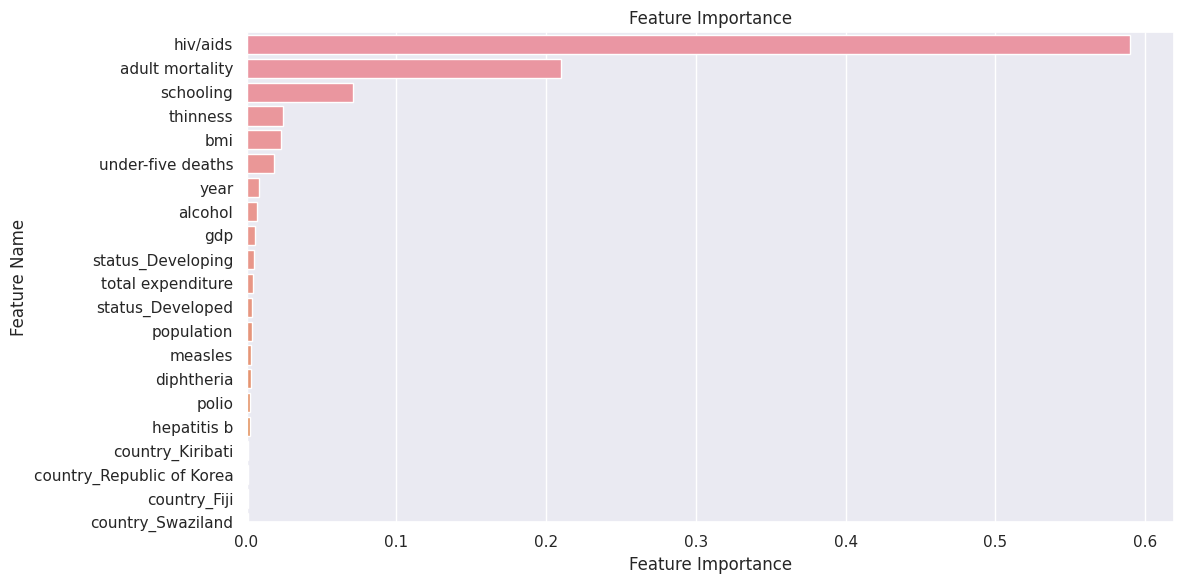

In [127]:
plt.figure(figsize=(12, 6))
fig = sns.barplot(
    y='Feature',
    x='Importance',
    data=feature_importance_df,
)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')

fig.set_ylim(20)
plt.tight_layout()

## Choosing the Best Model

In [128]:
model_name = []
r2score = []
mae = []
models = [
    SVR(),
    LinearRegression(),
    GradientBoostingRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=False),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    r2score.append(r2_score(Y_test, y_pred) * 100)
    mae.append(mean_absolute_error(Y_test, y_pred))

In [129]:
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "R2_score": r2score,
    'MAE': mae
})

models_df = models_df.astype({"R2_score": float, "MAE": float})
models_df.sort_values("MAE", ascending=True)

,Model-Name,R2_score,MAE
4,ExtraTreesRegressor,9.787334e+01,7.709881e-01
3,RandomForestRegressor,9.686072e+01,1.045774e+00
9,CatBoostRegressor,9.700088e+01,1.063715e+00
7,XGBRegressor,9.681032e+01,1.103714e+00
10,Ridge,9.500938e+01,1.413182e+00
6,DecisionTreeRegressor,9.289009e+01,1.445918e+00
8,XGBRFRegressor,9.450353e+01,1.560761e+00
2,GradientBoostingRegressor,9.450225e+01,1.567789e+00
0,SVR,9.132679e+01,1.833532e+00
5,AdaBoostRegressor,8.838101e+01,2.558679e+00


### HyperParameters Tunning

In [130]:
param_grid = {
    'n_estimators': np.arange(50, 1001, 50),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

extra_trees = ExtraTreesRegressor()

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=extra_trees,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    random_state=42,
    n_jobs=-1,
    scoring=mae_scorer,
    # verbose=2,
    verbose=False
)

random_search.fit(X_train, Y_train)

best_params = random_search.best_params_

print("Best parameters found: ", random_search.best_params_)
print("Best mean absolute error: ", -random_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters found:  {'n_estimators': 750, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': False}
Best mean absolute error:  0.9465990921985815


In [131]:
# Get the best model from the search
best_extra_trees = random_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_extra_trees.predict(X_test)

# Calculate the REAL test performance
real_mae = mean_absolute_error(Y_test, y_pred_tuned)
real_r2 = r2_score(Y_test, y_pred_tuned)

print(f"Real Test MAE after tuning: {real_mae:.4f}")
print(f"Real Test R² after tuning: {real_r2:.4f}")

Real Test MAE after tuning: 0.7698
Real Test R² after tuning: 0.9790


In [132]:
# Get the best parameters from randomized search
best_params = random_search.best_params_
print("Best parameters from randomized search:", best_params)

# Define a narrower grid around the best parameters
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_features': [best_params['max_features']],  # Keep the best value
    'max_depth': [None, best_params['max_depth']] if best_params['max_depth'] is not None else [None],
    'min_samples_split': [max(2, best_params['min_samples_split'] - 2),
                         best_params['min_samples_split'],
                         min(10, best_params['min_samples_split'] + 2)],
    'min_samples_leaf': [max(1, best_params['min_samples_leaf'] - 1),
                        best_params['min_samples_leaf'],
                        min(10, best_params['min_samples_leaf'] + 1)],
    'bootstrap': [best_params['bootstrap']]  # Keep the best value
}

# Remove None values if they exist
param_grid = {k: v for k, v in param_grid.items() if v}

print("\nGrid search parameters:")
for k, v in param_grid.items():
    print(f"{k}: {v}")

# Create the grid search
grid_search = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, Y_train)

# Get the best results
print("\nGrid Search Results:")
print("Best parameters:", grid_search.best_params_)
print("Best CV score (negative MAE):", grid_search.best_score_)
print("Best CV MAE:", -grid_search.best_score_)

# Compare with randomized search results
print("\nComparison:")
print(f"Randomized Search MAE: {-random_search.best_score_:.6f}")
print(f"Grid Search MAE: {-grid_search.best_score_:.6f}")
print(f"Improvement: {random_search.best_score_ - grid_search.best_score_:.6f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

test_mae = mean_absolute_error(Y_test, y_pred_grid)
test_r2 = r2_score(Y_test, y_pred_grid)

print(f"\nTest Set Performance:")
print(f"MAE: {test_mae:.6f}")
print(f"R²: {test_r2:.6f}")

Best parameters from randomized search: {'n_estimators': 750, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': False}

Grid search parameters:
n_estimators: [700, 750, 800]
max_features: [None]
max_depth: [None]
min_samples_split: [2, 4, 6]
min_samples_leaf: [1, 1, 2]
bootstrap: [False]
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Grid Search Results:
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Best CV score (negative MAE): -0.9288425531914978
Best CV MAE: 0.9288425531914978

Comparison:
Randomized Search MAE: 0.946599
Grid Search MAE: 0.928843
Improvement: -0.017757

Test Set Performance:
MAE: 0.755425
R²: 0.979160


## Voting Regressor

In [133]:
best_extra_trees = grid_search.best_estimator_
random_forest = RandomForestRegressor(random_state=42)
CatBoostRegressor = CatBoostRegressor(random_state=42, verbose=False)
XGBRegressor = XGBRegressor(random_state=42)

In [134]:
voting_regressor = VotingRegressor([
    ('extra_trees', best_extra_trees),
    ('xgb', XGBRegressor),
    ('random_forest', random_forest),
    ('CatBoostRegressor', CatBoostRegressor)
])

In [135]:
# Train and evaluate
voting_regressor.fit(X_train, Y_train)
y_pred_voting = voting_regressor.predict(X_test)

voting_mae = mean_absolute_error(Y_test, y_pred_voting)
voting_r2 = r2_score(Y_test, y_pred_voting)

print(f"Voting Regressor MAE: {voting_mae:.6f}")
print(f"Voting Regressor R²: {voting_r2:.6f}")

Voting Regressor MAE: 0.901848
Voting Regressor R²: 0.975413


## Stacking Regressor

In [137]:
# best_extra_trees = grid_search.best_estimator_
# random_forest = RandomForestRegressor(random_state=42)
# catboost_regressor = CatBoostRegressor(random_state=42, verbose=False)
# xgb_regressor = XGBRegressor(random_state=42)

base_models = [
    ('extra_trees', best_extra_trees),
    ('xgb', XGBRegressor),
    ('random_forest', random_forest),
    ('catboost', CatBoostRegressor)
]

stacking_regressor = StackingRegressor(
    estimators=base_models,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Train and evaluate
stacking_regressor.fit(X_train, Y_train)
y_pred_stacking = stacking_regressor.predict(X_test)

stacking_mae = mean_absolute_error(Y_test, y_pred_stacking)
stacking_r2 = r2_score(Y_test, y_pred_stacking)

print(f"Stacking Regressor MAE: {stacking_mae:.6f}")
print(f"Stacking Regressor R²: {stacking_r2:.6f}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.5s finished


Stacking Regressor MAE: 0.776919
Stacking Regressor R²: 0.978855


## Final Ensemble with Weighted Average

In [138]:
# Create a weighted ensemble of the best models
def weighted_ensemble_predict(X, models_weights):
    predictions = []
    for model, weight in models_weights:
        pred = model.predict(X)
        predictions.append(pred * weight)

    return np.sum(predictions, axis=0) / sum(weight for _, weight in models_weights)

# Define models and weights (you can optimize these weights)
models_weights = [
    (best_extra_trees, 0.9),      # Your best model gets highest weight
    (stacking_regressor, 0.1),   # Stacking gets good weight
]

# Make predictions with weighted ensemble
y_pred_ensemble = weighted_ensemble_predict(X_test, models_weights)
ensemble_mae = mean_absolute_error(Y_test, y_pred_ensemble)
ensemble_r2 = r2_score(Y_test, y_pred_ensemble)

print(f"\nWeighted Ensemble MAE: {ensemble_mae:.6f}")
print(f"Weighted Ensemble R²: {ensemble_r2:.6f}")




Weighted Ensemble MAE: 0.755187
Weighted Ensemble R²: 0.979176


## the final pipeline

In [139]:
class EnsemblePredictor(TransformerMixin, BaseEstimator):
    def __init__(self, models_weights=None):
        self.models_weights = models_weights
        self.feature_names_in_ = None  # Store expected feature names

    def fit(self, X, y=None):
        # Store the feature names from training data
        if hasattr(X, 'columns'):
            self.feature_names_in_ = list(X.columns)
        return self

    def transform(self, X):
        return self.predict(X).reshape(-1, 1)  # Reshape for pipeline compatibility

    def predict(self, X):
        if self.models_weights is None:
            raise ValueError("models_weights must be provided")

        # Ensure X has the same columns as training data
        if hasattr(X, 'columns') and self.feature_names_in_ is not None:
            # Add missing columns with zeros
            for col in self.feature_names_in_:
                if col not in X.columns:
                    X[col] = 0
            # Reorder columns to match training order
            X = X[self.feature_names_in_]

        predictions = []
        total_weight = 0
        for model, weight in self.models_weights:
            pred = model.predict(X)
            predictions.append(pred * weight)
            total_weight += weight

        return np.sum(predictions, axis=0) / total_weight

    def set_models_weights(self, models_weights):
        """Set models and weights after initialization"""
        self.models_weights = models_weights
        return self

In [140]:
models_weights = [
    (best_extra_trees, 0.9),      # Your best model gets highest weight
    (stacking_regressor, 0.1),    # Stacking gets good weight
]

# Create the complete pipeline including preprocessing and ensemble prediction

final_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('predictor', EnsemblePredictor(models_weights=models_weights))
])


In [141]:
X_final, Y_final = df_final.drop(columns=['life expectancy']), df_final['life expectancy']
X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(X_final, Y_final, test_size=0.2, random_state=42)


In [142]:
final_pipeline.fit(X_train_final, Y_train_final)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('impute_cat',
                                  DataFrameImputer(freq_cols=['country',
                                                              'status'])),
                                 ('impute_num',
                                  DataFrameImputer(knn_cols=['year',
                                                             'adult mortality',
                                                             'alcohol',
                                                             'hepatitis b',
                                                             'measles', 'bmi',
                                                             'under-five '
                                                             'deaths',
                                                             'polio',
                                                             'total '
                                                             'expenditure',
                                                             'diphtheria',
                                                             'hiv/aids', 'gdp',
                                                             'population',
                                                             'schooling',
                                                             'thinness'])),
                                 ('log_transfor...
                                                                                                max_delta_step=None,
                                                                                                max_depth=None,
                                                                                                max_leaves=None,
                                                                                                min_child_weight=None,
                                                                                                missing=nan,
                                                                                                monotone_constraints=None,
                                                                                                multi_strategy=None,
                                                                                                n_estimators=None,
                                                                                                n_jobs=None,
                                                                                                num_parallel_tree=None,
                                                                                                random_state=42, ...)),
                                                                                  ('random_forest',
                                                                                   RandomForestRegressor(random_state=42)),
                                                                                  ('catboost',
                                                                                   <catboost.core.CatBoostRegressor object at 0x7a73e6b68d10>)],
                                                                      n_jobs=-1,
                                                                      verbose=1),
                                                    0.1)]))])

In [143]:
y_pred = final_pipeline.predict(X_test_final)
print(f"Pipeline MAE: {mean_absolute_error(Y_test_final, y_pred):.6f}")

Pipeline MAE: 0.755187


## saving the models

In [144]:
# Save each component
joblib.dump(full_pipeline, 'preprocessing_pipeline.joblib')
joblib.dump(best_extra_trees, 'best_extra_trees.joblib')
joblib.dump(stacking_regressor, 'stacking_regressor.joblib')

['stacking_regressor.joblib']

In [145]:
joblib.dump(final_pipeline, 'final_pipeline.joblib')


['final_pipeline.joblib']

In [147]:
prediction_pipeline = joblib.load('final_pipeline.joblib')

In [148]:
y_pred = prediction_pipeline.predict(X_test_final)
print(f"Pipeline MAE: {mean_absolute_error(Y_test_final, y_pred):.6f}")

Pipeline MAE: 0.755187
